In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Data Understanding 

In [60]:
#Reading the dataset
loan_df = pd.read_csv('loan.csv',low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [62]:
#Details of df
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [63]:
loan_df[loan_df.duplicated('id')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [64]:
#Summary of numeric coloumn
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [65]:
# Checking rows and columns of df
loan_df.shape

(39717, 111)

# Missing Value Treatment and Dropping of columns

In [66]:
#Checking for column-wise null count
print(loan_df.isnull().sum())

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [67]:
#Checking for column-wise null count in percentage
round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


#### Few columns have 100% missing values which cannot be used for analysis so we can drop columns with missing values more than 90%

In [68]:
# Dropping the columns for missing values more than 90%
Drop_Missing_Columns = loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) > 90]
loan_df = loan_df.drop(Drop_Missing_Columns, axis=1)

In [69]:
#Dropping more irrelevant columns from data set as they contain 0 or NA and are not necessary for analysis
Irrelevant_Colnames = ['member_id','pymnt_plan','url','desc','title','mths_since_last_delinq', 
            'initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq', 
            'chargeoff_within_12_mths','delinq_amnt','tax_liens']
loan_df = loan_df.drop(Irrelevant_Colnames, axis=1)

In [70]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

### Variable	Description

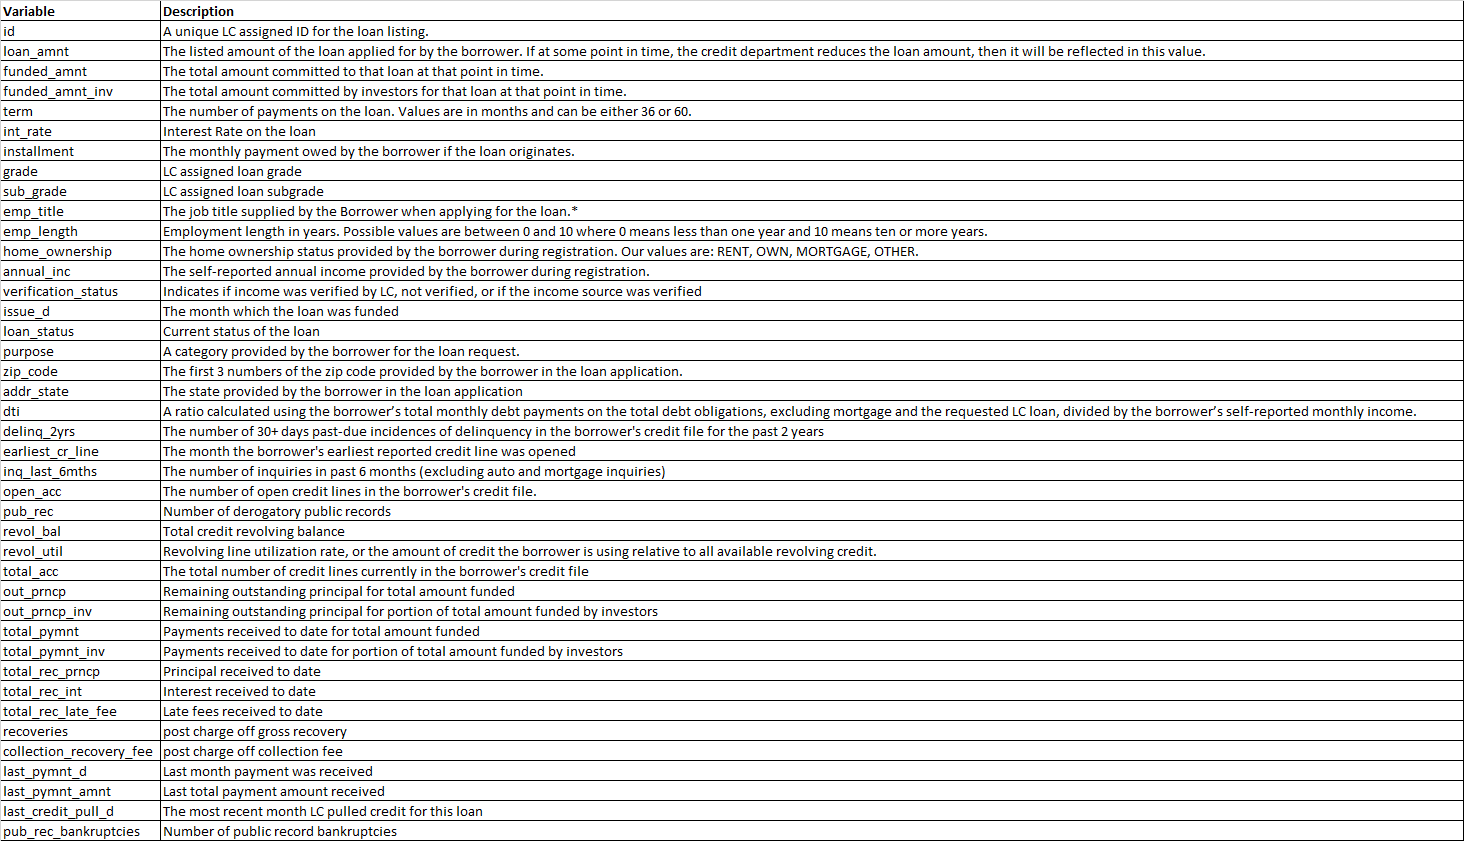

# Data Cleaning and Creating Derived Metrics

In [71]:
#Removing % sign from int_rate and revol_util
loan_df['int_rate']= loan_df['int_rate'].str.replace('%','').astype(float)
loan_df['revol_util']= loan_df['revol_util'].str.replace('%','').astype(float)

In [72]:
#Dropping Current status as Applicant is in the process of paying the installments
loan_df = loan_df.loc[loan_df['loan_status']!='Current']

#Assign True(1) or False(0) values for fully paid and charged off
loan_df['Fully_Paid'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)
loan_df['Charged_Off'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan_df.shape

(38577, 43)

In [73]:
#To remove month and spaces from term variable
loan_df.term = loan_df.term.str.strip()
loan_df.term = loan_df.term.apply(lambda x: int(x[0:2]))

In [74]:
loan_df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [75]:
# Convert the Issue date into date time and seperating month and year
from datetime import datetime
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan_df['month'] = loan_df['issue_d'].apply(lambda x: x.month)
loan_df['year'] = loan_df['issue_d'].apply(lambda x: x.year)

In [76]:
#Creating a new column for funded_amnt and bucket in various slots.
def Funded_Loan_Amt(a): 
    if a >= 500 and a <2000:
        return '500 to 2k'
    elif a >=2000 and a <5000:
        return '2k to 5k'
    elif a >=5000 and a <10000:
        return '5k to 10k'
    elif a >=10000 and a <15000:
        return '10k to 15k'
    elif a >=15000 and a <20000:
        return '15k to 20k'
    elif a >=20000 and a <25000:
        return '20k to 25k'
    elif a >=25000 and a <30000:
        return '25k to 30k'
    elif a >=30000 and a <35000:
        return '30k to 35k'
    else:
        return'Above 35k'

loan_df['Funded_Loan_Amount']=loan_df['funded_amnt'].apply(Funded_Loan_Amt)

In [77]:
#Creating a new column for int_rate and bucket in various slots.
def interest_rate(a):
    if a >= 6 and a <10:
        return 'Low'
    elif a >=10 and a <15:
        return 'Moderate'
    elif a >=15 and a <20:
        return 'Moderate High'
    elif a >=20 and a <25:
        return 'High'
    else:
        return'Very High'

loan_df['Interest_Rate']=loan_df['int_rate'].apply(interest_rate)

In [78]:
#Creating a new column for installment and bucket in various slots.
def Installment_Amount(a): 
    if a >= 0 and a <200:
        return 'Below 200'
    elif a >=200 and a <400:
        return 'Within 200 to 400'
    elif a >=400 and a <600:
        return 'Within 400 to 600'
    elif a >=600 and a <800:
        return 'Within 600 to 800'
    elif a >=800 and a <1000:
        return 'Within 800 to 1000'
    elif a >=1000 and a <1200:
        return 'Within 1000 to 1200'
    elif a >=1200 and a <1400:
        return 'Within 1200 to 1400'
    else:
        return'Above 1400'

loan_df['Monthly_Installment_Amount']=loan_df['installment'].apply(Installment_Amount)

In [79]:
#Creating a new column for annual_inc and bucket in various slots.
def Annual_income(a): 
    if a >= 10000 and a <30000:
        return 'Moderately Low'
    elif a >=30000 and a <60000:
        return 'Moderate'
    elif a >=60000 and a <90000:
        return 'Moderately High'
    elif a >=90000 and a <120000:
        return 'High'
    else:
        return'Very High'

loan_df['Annual_Income']=loan_df['annual_inc'].apply(Annual_income)

In [80]:
#Creating a new column for dti and bucket in various slots.
def dti_ratio(a): 
    if a >= 0 and a <10:
        return 'Low'
    elif a >=10 and a <20:
        return 'Moderate'
    elif a >=20 and a <30:
        return 'High'
    else:
        return'Very High'

loan_df['DTI_Ratio']=loan_df['dti'].apply(dti_ratio)

In [81]:
#Creating a new column for revol_util and bucket in various slots.

#To treat the missing values
loan_df = loan_df.loc[loan_df['revol_util'].notnull()]

def Revolving_line_utilization_rate(a): 
    if a >= 0.00 and a <20.00:
        return 'Low'
    elif a >=20.00 and a <40.00:
        return 'Moderate'
    elif a >=40.00 and a <60.00:
        return 'Moderate High'
    elif a >=60.00 and a <80.00:
        return 'High'
    elif a >=80.00 and a <101.00:
        return 'Very High'
    else:
        return'Null'

loan_df['Revolving_Rate']=loan_df['revol_util'].apply(Revolving_line_utilization_rate)

In [82]:
#Creating a new column for open_acc and bucket in various slots.
def Open_Account_Creditline(a): 
    if a >= 0 and a <10:
        return 'Less than 10'
    elif a >=10 and a <20:
        return 'within 10 to 20'
    elif a >=20 and a <30:
        return 'within 20 to 30'
    elif a >=30 and a <40:
        return 'within 30 to 40'
    elif a >=40 and a <50:
        return 'within 40 to 50'
    else:
        return'Above 50'

loan_df['Open_Acc_Creditline']=loan_df['open_acc'].apply(Open_Account_Creditline)

In [83]:
#Creating a new column for total_acc and bucket in various slots.
def Total_Account_Creditline(a): 
    if a >= 0 and a <15:
        return 'Less than 15'
    elif a >=15 and a <30:
        return 'within 15 to 30'
    elif a >=30 and a <45:
        return 'within 30 to 45'
    elif a >=45 and a <60:
        return 'within 45 to 60'
    elif a >=60 and a <75:
        return 'within 60 to 75'
    elif a >=75 and a <90:
        return 'within 75 to 90'
    else:
        return'Above 90'

loan_df['Total_Acc_Creditline']=loan_df['total_acc'].apply(Total_Account_Creditline)

In [84]:
#Creating a new column for total_rec_late_fee and bucket in various slots.
def Total_Late_Fee(a): 
    if a >= 0 and a <50:
        return 'Low'
    elif a >=50 and a <100:
        return 'Moderate'
    elif a >=100 and a <150:
        return 'Moderate High'
    elif a >=150 and a <200:
        return 'High'
    else:
        return'Very High'

loan_df['Total_Late_Fee_Received']=loan_df['total_rec_late_fee'].apply(Total_Late_Fee)

In [85]:
loan_df.to_csv("loan_df_Clean.csv")

# Univariate Analysis

D:\Anaconda_Setup\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'DTI')

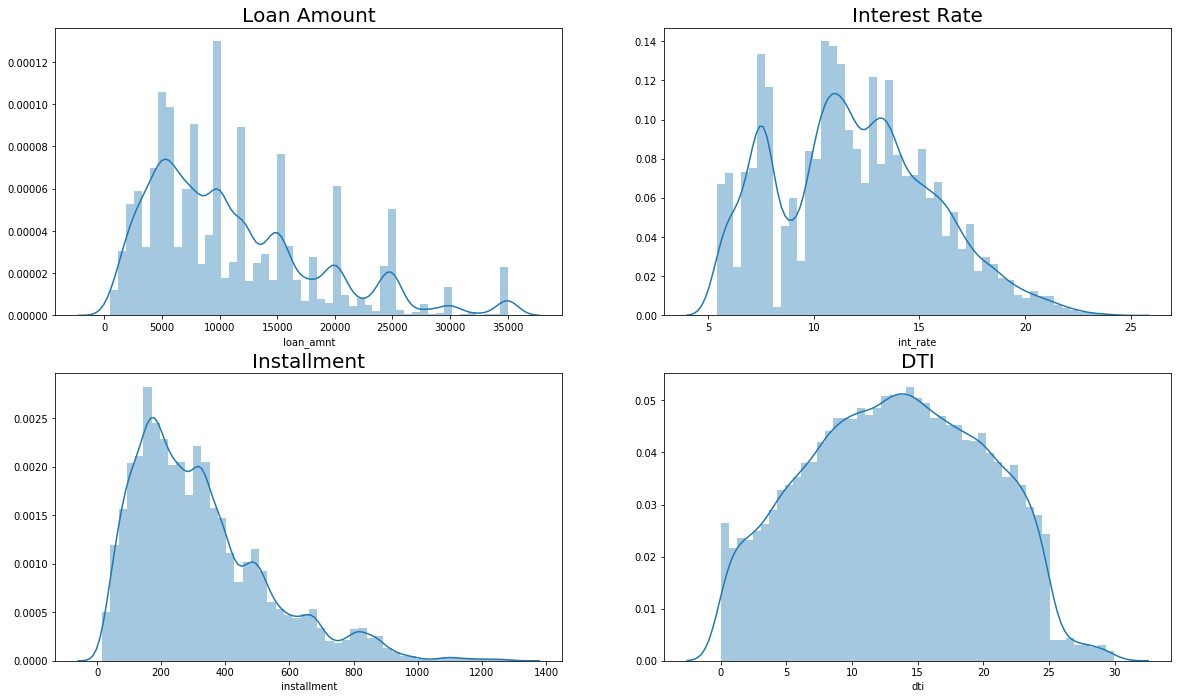

In [86]:
plt.figure(figsize=(20, 18))

# subplot 1: Loan Amount
plt.subplot(3, 2, 1)
sns.distplot(loan_df['loan_amnt'])
plt.title("Loan Amount", size = 20)
           
# subplot 2: Interest Rate
plt.subplot(3, 2, 2)
sns.distplot(loan_df['int_rate'])
plt.title("Interest Rate", size = 20)

# subplot 3: Installment
plt.subplot(3, 2, 3)
sns.distplot(loan_df['installment'])
plt.title("Installment", size = 20)

# subplot 4: DTI
plt.subplot(3, 2, 4)
sns.distplot(loan_df['dti'])
plt.title("DTI", size = 20)

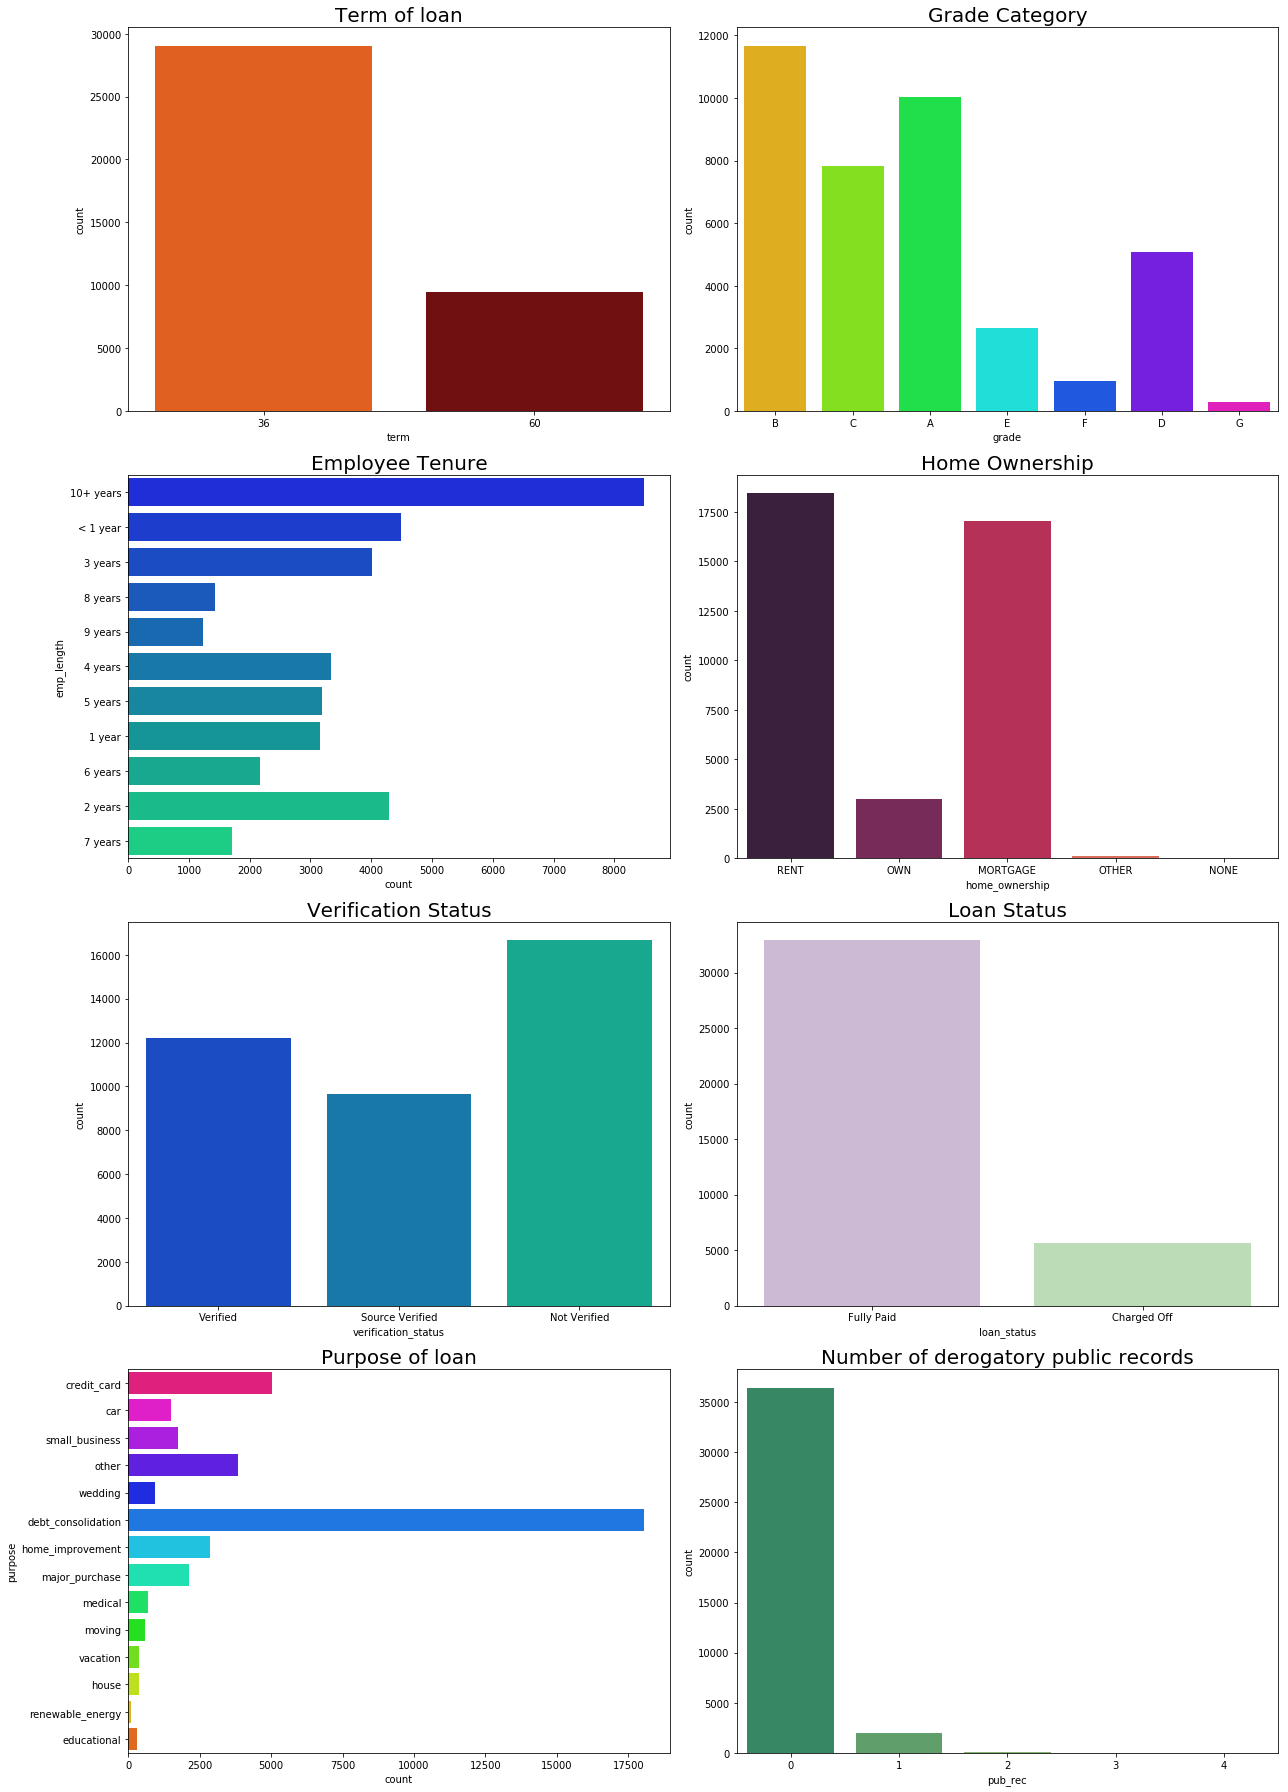

In [87]:
plt.figure(figsize=(18, 25))

# subplot 1: Terms
plt.subplot(4, 2, 1)
sns.countplot(x='term', palette='gist_heat_r', data=loan_df)
plt.title("Term of loan", size = 20)

# subplot 2: Grade
plt.subplot(4, 2, 2)
sns.countplot(x='grade', palette='hsv', data=loan_df)
plt.title("Grade Category", size = 20)

# subplot 3: Emp_length
plt.subplot(4, 2, 3)
sns.countplot(y='emp_length', palette='winter', data=loan_df)
plt.title("Employee Tenure", size = 20)

# subplot 4: home_ownership
plt.subplot(4, 2, 4)
sns.countplot(x='home_ownership',palette='rocket', data=loan_df)
plt.title("Home Ownership", size = 20)

# subplot 5: verification_status
plt.subplot(4, 2, 5)
sns.countplot(x='verification_status', palette='winter', data=loan_df)
plt.title("Verification Status", size = 20)

# subplot 6: loan_df_status
plt.subplot(4, 2, 6)
sns.countplot(x='loan_status', palette='PRGn', data=loan_df)
plt.title("Loan Status", size = 20)

# subplot 7: purpose
plt.subplot(4, 2, 7)
sns.countplot(y='purpose', palette='hsv_r', data=loan_df)
plt.title("Purpose of loan", size = 20)

# subplot 8: addr_state
plt.subplot(4, 2, 8)
sns.countplot(x='pub_rec',palette='summer', data=loan_df)
plt.title("Number of derogatory public records", size = 20)

plt.tight_layout()
plt.show()

# Segmented Univariate Analysis

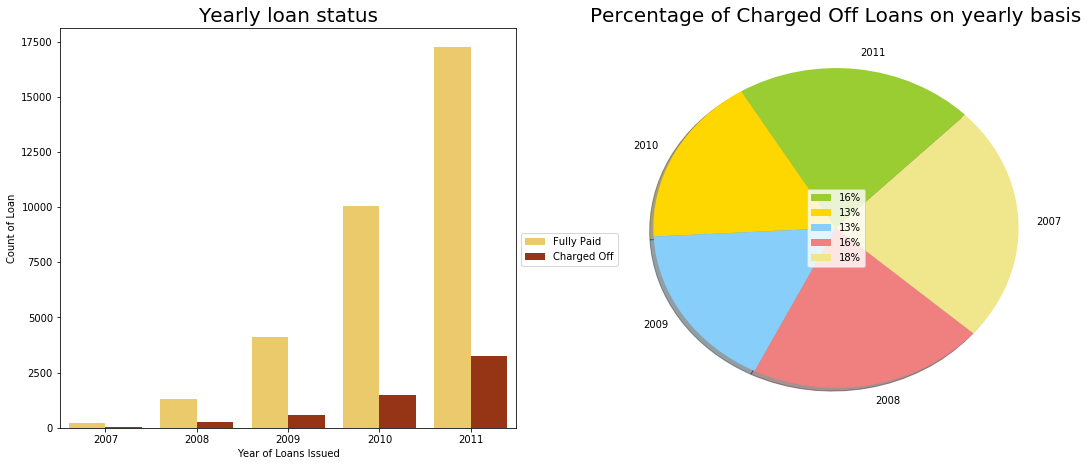

year  Fully_Paid  Charged_Off
2011       17255         3252
2010       10033         1480
2009        4111          591
2008        1311          243
2007         206           45


In [88]:
plt.subplots(figsize = (18,25))

#Plot 1: Yearly loan status
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(x = 'year',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Year of Loans Issued')
plt.ylabel('Count of Loan')
plt.title("Yearly loan status", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#To calculate count of charged off and fully paid loans
loan_year = pd.DataFrame(loan_df.groupby('year')['Fully_Paid','Charged_Off'].sum().reset_index())
loan_year = loan_year.sort_values(by=["Fully_Paid","Charged_Off"], ascending=[False, True])

#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_year['Charged_Off'], loan_year['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_year['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_year['Fully_Paid'], Total)]
Category = list(loan_year['year'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))

#Plot 2: Percentage of Charged Off Loans on yearly basis
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.title("Percentage of Charged Off Loans on yearly basis",size = 20)
plt.legend(label, loc="center")

plt.show()
print(loan_year.to_string(index=False))


### In the year 2007, 17.92% of loans were charged off as compared to other years.

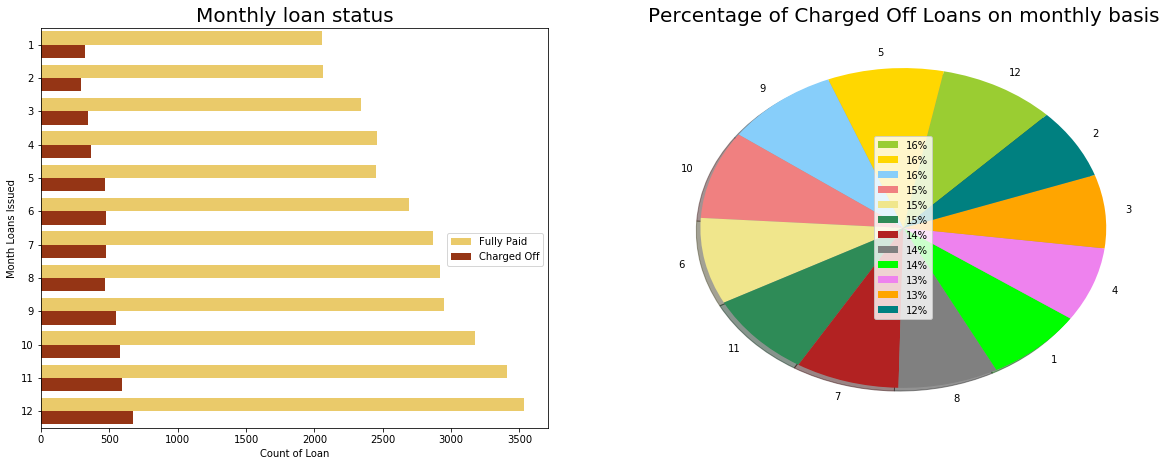

month  Fully_Paid  Charged_Off  Total  percent_chargeoff
   12        3534          677   4211          16.076941
    5        2453          466   2919          15.964371
    9        2951          546   3497          15.613383
   10        3176          579   3755          15.419441
    6        2693          479   3172          15.100883
   11        3406          596   4002          14.892554
    7        2867          478   3345          14.289985
    8        2918          466   3384          13.770686
    1        2053          321   2374          13.521483
    4        2460          369   2829          13.043478
    3        2339          344   2683          12.821469
    2        2066          290   2356          12.308998


In [89]:
plt.subplots(figsize = (20,25))

#Plot 1: Monthly loan status
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(y = 'month',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.ylabel('Month Loans Issued')
plt.xlabel('Count of Loan')
plt.title("Monthly loan status", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#To calculate count of charged off and fully paid loans
loan_Month = pd.DataFrame(loan_df.groupby(['month'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_Month['Total'] = loan_Month.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_Month['percent_chargeoff'] = loan_Month.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_Month = loan_Month.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_Month['Charged_Off'], loan_Month['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_Month['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_Month['Fully_Paid'], Total)]
Category = list(loan_Month['month'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans on monthly basis
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.title("Percentage of Charged Off Loans on monthly basis",size = 20)
plt.legend(label, loc="center")

plt.show()
print(loan_Month.to_string(index=False))

### In the month of december 16.07% of loans were charged off.

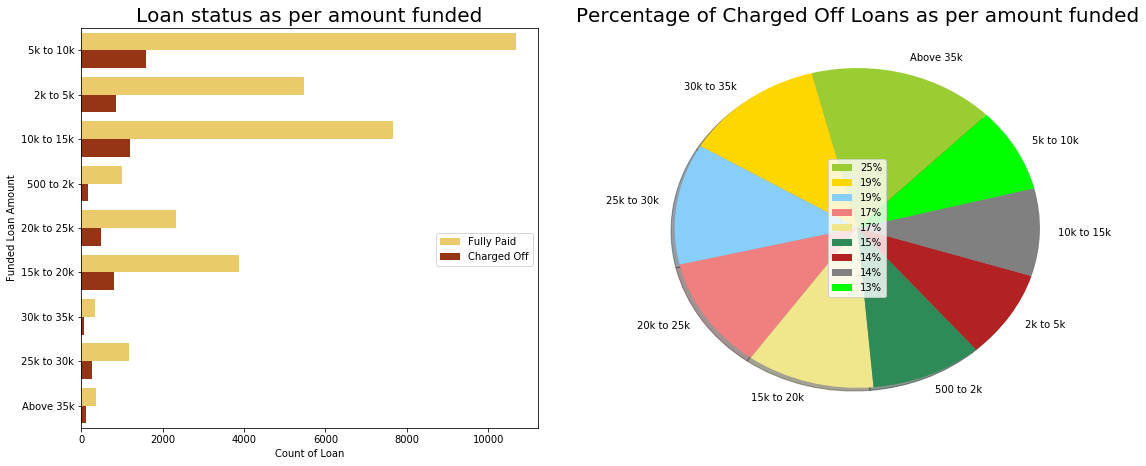

Funded_Loan_Amount  Fully_Paid  Charged_Off  Total  percent_chargeoff
        Above 35k         373          126    499          25.250501
       30k to 35k         337           79    416          18.990385
       25k to 30k        1165          268   1433          18.702024
       20k to 25k        2341          493   2834          17.395907
       15k to 20k        3888          815   4703          17.329364
        500 to 2k         994          176   1170          15.042735
         2k to 5k        5480          860   6340          13.564669
       10k to 15k        7657         1198   8855          13.529080
        5k to 10k       10681         1596  12277          12.999919


In [90]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per amount funded
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(y = 'Funded_Loan_Amount',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Count of Loan')
plt.ylabel('Funded Loan Amount')
plt.title("Loan status as per amount funded", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#To calculate count of charged off and fully paid loans
loan_funded_amnt = pd.DataFrame(loan_df.groupby(['Funded_Loan_Amount'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_funded_amnt['Total'] = loan_funded_amnt.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_funded_amnt['percent_chargeoff'] = loan_funded_amnt.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_funded_amnt = loan_funded_amnt.sort_values(['percent_chargeoff'], ascending=[False])

#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_funded_amnt['Charged_Off'], loan_funded_amnt['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_funded_amnt['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_funded_amnt['Fully_Paid'], Total)]
Category = list(loan_funded_amnt['Funded_Loan_Amount'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))

#Plot 2: Percentage of Charged Off Loans as per amount funded
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("Percentage of Charged Off Loans as per amount funded",size = 20)

plt.show()
print(loan_funded_amnt.to_string(index=False))

### Loan amount which are funded above 35000 had a major charged off proportion of 25.25%.

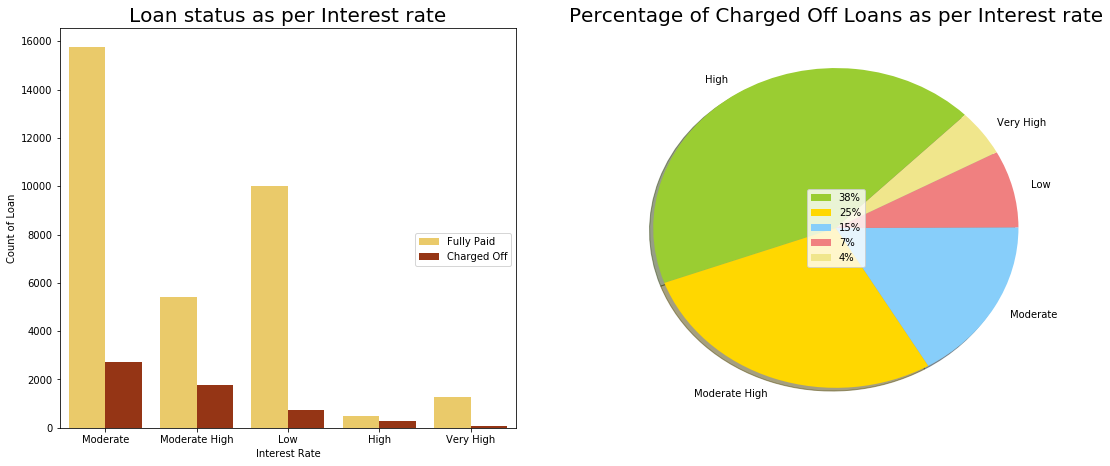

Interest_Rate  Fully_Paid  Charged_Off  Total  percent_chargeoff
         High         473          294    767          38.331160
Moderate High        5414         1785   7199          24.795110
     Moderate       15761         2733  18494          14.777766
          Low        9993          744  10737           6.929310
    Very High        1275           55   1330           4.135338


In [91]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per Interest rate
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(x = 'Interest_Rate',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Interest Rate')
plt.ylabel('Count of Loan')
plt.title("Loan status as per Interest rate", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_Interest_Rate = pd.DataFrame(loan_df.groupby(['Interest_Rate'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_Interest_Rate['Total'] = loan_Interest_Rate.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_Interest_Rate['percent_chargeoff'] = loan_Interest_Rate.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_Interest_Rate = loan_Interest_Rate.sort_values(['percent_chargeoff'], ascending=[False])

#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_Interest_Rate['Charged_Off'], loan_Interest_Rate['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_Interest_Rate['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_Interest_Rate['Fully_Paid'], Total)]
Category = list(loan_Interest_Rate['Interest_Rate'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per amount funded
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("Percentage of Charged Off Loans as per Interest rate", size = 20)

plt.show()
print(loan_Interest_Rate.to_string(index=False))

### Loans with Interest rate between 20% to 25% had a major charged off proportion of 38.33%.

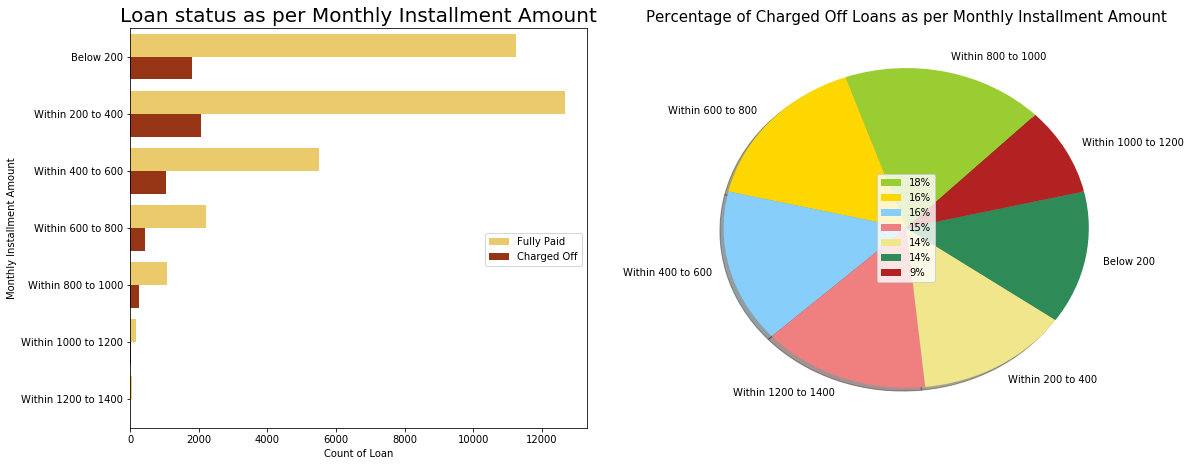

Monthly_Installment_Amount  Fully_Paid  Charged_Off  Total  percent_chargeoff
       Within 800 to 1000        1090          246   1336          18.413174
        Within 600 to 800        2204          433   2637          16.420174
        Within 400 to 600        5513         1047   6560          15.960366
      Within 1200 to 1400          50            9     59          15.254237
        Within 200 to 400       12665         2057  14722          13.972286
                Below 200       11234         1803  13037          13.829869
      Within 1000 to 1200         160           16    176           9.090909


In [92]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per Monthly Installment Amount
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(y = 'Monthly_Installment_Amount',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Count of Loan')
plt.ylabel('Monthly Installment Amount')
plt.title("Loan status as per Monthly Installment Amount", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_Monthly_Installment_Amt = pd.DataFrame(loan_df.groupby(['Monthly_Installment_Amount'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_Monthly_Installment_Amt['Total'] = loan_Monthly_Installment_Amt.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_Monthly_Installment_Amt['percent_chargeoff'] = loan_Monthly_Installment_Amt.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_Monthly_Installment_Amt = loan_Monthly_Installment_Amt.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_Monthly_Installment_Amt['Charged_Off'], loan_Monthly_Installment_Amt['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_Monthly_Installment_Amt['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_Monthly_Installment_Amt['Fully_Paid'], Total)]
Category = list(loan_Monthly_Installment_Amt['Monthly_Installment_Amount'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per Monthly Installment Amount
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("Percentage of Charged Off Loans as per Monthly Installment Amount", size = 15)

plt.show()
print(loan_Monthly_Installment_Amt.to_string(index=False))

### Loans with monthly installment amount between 800 to 1000 had a major charged off proportion of 18.41%.

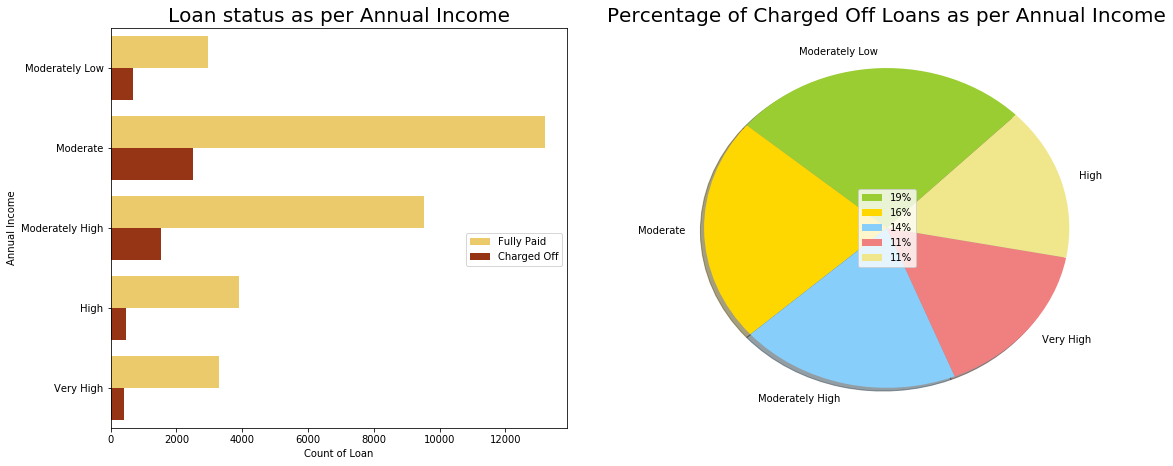

Annual_Income  Fully_Paid  Charged_Off  Total  percent_chargeoff
 Moderately Low        2968          679   3647          18.618042
       Moderate       13212         2517  15729          16.002289
Moderately High        9528         1518  11046          13.742531
      Very High        3291          417   3708          11.245955
           High        3917          480   4397          10.916534


In [93]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per Annual Incoome
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(y = 'Annual_Income',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.ylabel('Annual Income')
plt.xlabel('Count of Loan')
plt.title("Loan status as per Annual Income", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_Annual_Income = pd.DataFrame(loan_df.groupby(['Annual_Income'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_Annual_Income['Total'] = loan_Annual_Income.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_Annual_Income['percent_chargeoff'] = loan_Annual_Income.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_Annual_Income = loan_Annual_Income.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_Annual_Income['Charged_Off'], loan_Annual_Income['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_Annual_Income['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_Annual_Income['Fully_Paid'], Total)]
Category = list(loan_Annual_Income['Annual_Income'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per Annual Income
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("Percentage of Charged Off Loans as per Annual Income", size = 20)

plt.show()
print(loan_Annual_Income.to_string(index=False))

### Loans of applicant with annual income 10000 to 30000 had a major charged off proportion of 18.61%.

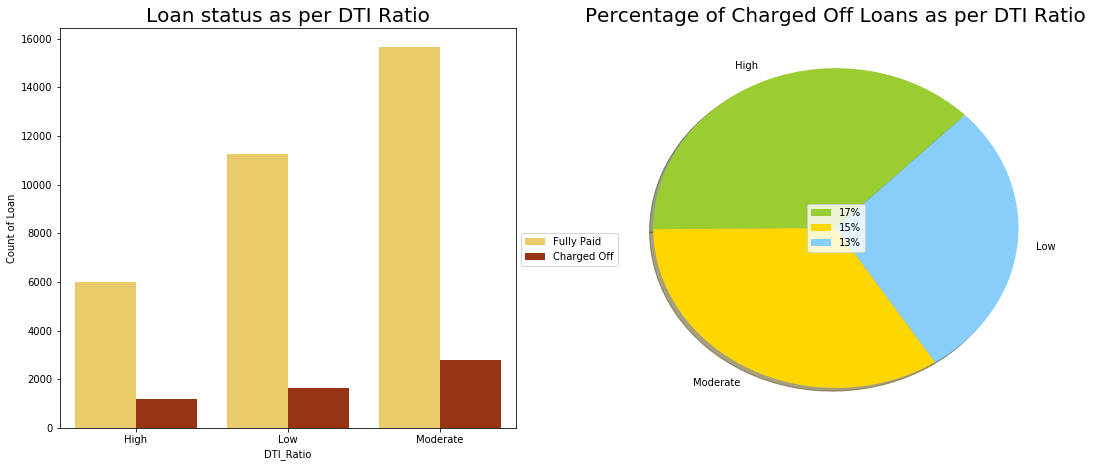

DTI_Ratio  Fully_Paid  Charged_Off  Total  percent_chargeoff
    High        6013         1205   7218          16.694375
Moderate       15642         2785  18427          15.113692
     Low       11261         1621  12882          12.583450


In [94]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per DTI_Ratio
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(x = 'DTI_Ratio',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('DTI_Ratio')
plt.ylabel('Count of Loan')
plt.title("Loan status as per DTI Ratio", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#To calculate count of charged off and fully paid loans
loan_DTI_Ratio = pd.DataFrame(loan_df.groupby(['DTI_Ratio'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_DTI_Ratio['Total'] = loan_DTI_Ratio.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_DTI_Ratio['percent_chargeoff'] = loan_DTI_Ratio.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_DTI_Ratio = loan_DTI_Ratio.sort_values(['percent_chargeoff'], ascending=[False])



#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_DTI_Ratio['Charged_Off'], loan_DTI_Ratio['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_DTI_Ratio['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_DTI_Ratio['Fully_Paid'], Total)]
Category = list(loan_DTI_Ratio['DTI_Ratio'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per Annual Income
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("Percentage of Charged Off Loans as per DTI Ratio", size = 20)

plt.show()
print(loan_DTI_Ratio.to_string(index=False))

### Loans with DTI Ratio between 20 to 30  had a major charged off proportion of 16.69%.

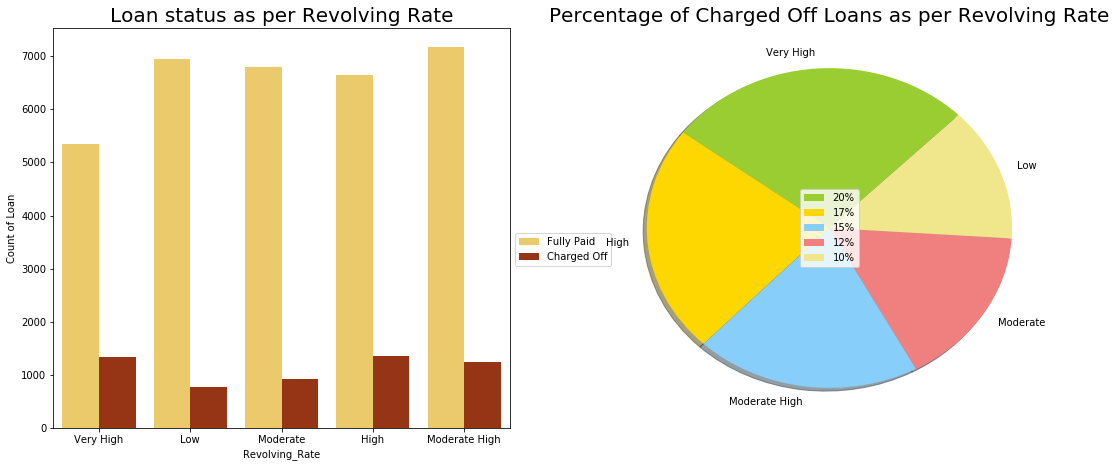

Revolving_Rate  Fully_Paid  Charged_Off  Total  percent_chargeoff
    Very High        5343         1340   6683          20.050875
         High        6653         1359   8012          16.962057
Moderate High        7170         1232   8402          14.663175
     Moderate        6802          913   7715          11.834089
          Low        6948          767   7715           9.941672


In [95]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per Revolving_Rate
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(x = 'Revolving_Rate',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Revolving_Rate')
plt.ylabel('Count of Loan')
plt.title("Loan status as per Revolving Rate", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_Revolving_Rate = pd.DataFrame(loan_df.groupby(['Revolving_Rate'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_Revolving_Rate['Total'] = loan_Revolving_Rate.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_Revolving_Rate['percent_chargeoff'] = loan_Revolving_Rate.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_Revolving_Rate = loan_Revolving_Rate.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_Revolving_Rate['Charged_Off'], loan_Revolving_Rate['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_Revolving_Rate['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_Revolving_Rate['Fully_Paid'], Total)]
Category = list(loan_Revolving_Rate['Revolving_Rate'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per Revolving_Rate
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("Percentage of Charged Off Loans as per Revolving Rate", size = 20)

plt.show()
print(loan_Revolving_Rate.to_string(index=False))

### Loans with Revolving line utilization rate between 80% to 100% had a major charged off proportion of 20.05%.

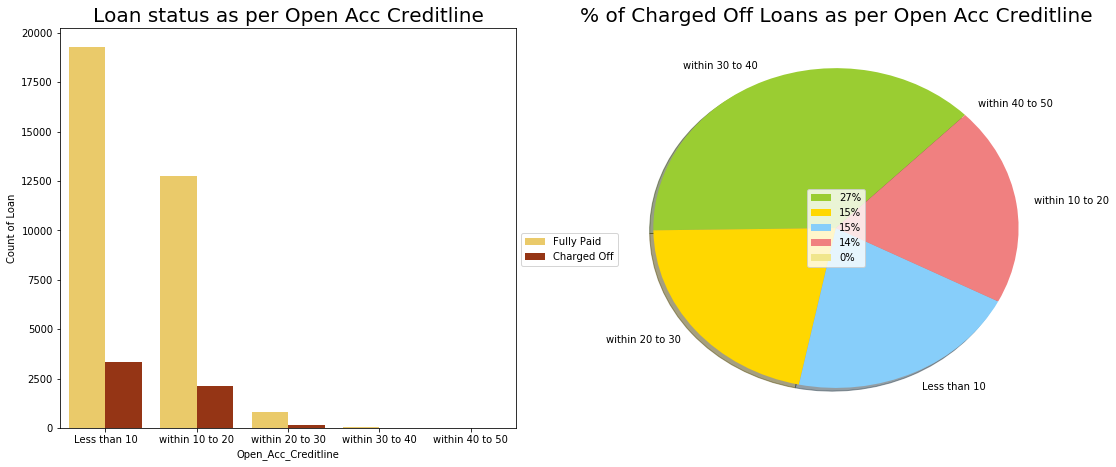

Open_Acc_Creditline  Fully_Paid  Charged_Off  Total  percent_chargeoff
   within 30 to 40          30           11     41          26.829268
   within 20 to 30         819          148    967          15.305067
      Less than 10       19284         3322  22606          14.695214
   within 10 to 20       12780         2130  14910          14.285714
   within 40 to 50           3            0      3           0.000000


In [96]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per Open_Acc_Creditline
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(x = 'Open_Acc_Creditline',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Open_Acc_Creditline')
plt.ylabel('Count of Loan')
plt.title("Loan status as per Open Acc Creditline", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_Open_Acc_Creditline = pd.DataFrame(loan_df.groupby(['Open_Acc_Creditline'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_Open_Acc_Creditline['Total'] = loan_Open_Acc_Creditline.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_Open_Acc_Creditline['percent_chargeoff'] = loan_Open_Acc_Creditline.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_Open_Acc_Creditline = loan_Open_Acc_Creditline.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_Open_Acc_Creditline['Charged_Off'], loan_Open_Acc_Creditline['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_Open_Acc_Creditline['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_Open_Acc_Creditline['Fully_Paid'], Total)]
Category = list(loan_Open_Acc_Creditline['Open_Acc_Creditline'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per Open_Acc_Creditline
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per Open Acc Creditline", size = 20)

plt.show()
print(loan_Open_Acc_Creditline.to_string(index=False))

### Open Account creditline within 30 to 40 had a major charged off proportion of 26.82%.

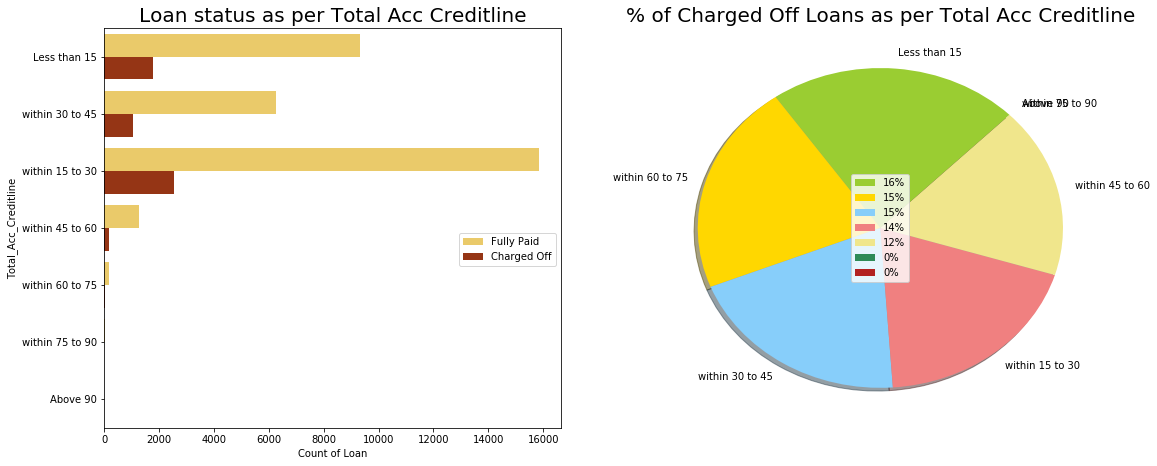

Total_Acc_Creditline  Fully_Paid  Charged_Off  Total  percent_chargeoff
       Less than 15        9321         1784  11105          16.064836
    within 60 to 75         187           34    221          15.384615
    within 30 to 45        6278         1066   7344          14.515251
    within 15 to 30       15848         2546  18394          13.841470
    within 45 to 60        1270          181   1451          12.474156
           Above 90           1            0      1           0.000000
    within 75 to 90          11            0     11           0.000000


In [97]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per Total_Acc_Creditline
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(y = 'Total_Acc_Creditline',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.ylabel('Total_Acc_Creditline')
plt.xlabel('Count of Loan')
plt.title("Loan status as per Total Acc Creditline", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_Total_Acc_Creditline = pd.DataFrame(loan_df.groupby(['Total_Acc_Creditline'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_Total_Acc_Creditline['Total'] = loan_Total_Acc_Creditline.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_Total_Acc_Creditline['percent_chargeoff'] = loan_Total_Acc_Creditline.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_Total_Acc_Creditline = loan_Total_Acc_Creditline.sort_values(['percent_chargeoff'], ascending=[False])



#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_Total_Acc_Creditline['Charged_Off'], loan_Total_Acc_Creditline['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_Total_Acc_Creditline['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_Total_Acc_Creditline['Fully_Paid'], Total)]
Category = list(loan_Total_Acc_Creditline['Total_Acc_Creditline'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per Total_Acc_Creditline
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per Total Acc Creditline", size = 20)

plt.show()
print(loan_Total_Acc_Creditline.to_string(index=False))

### Total Account creditline less than 15 had a major charged off proportion of 16.06%.

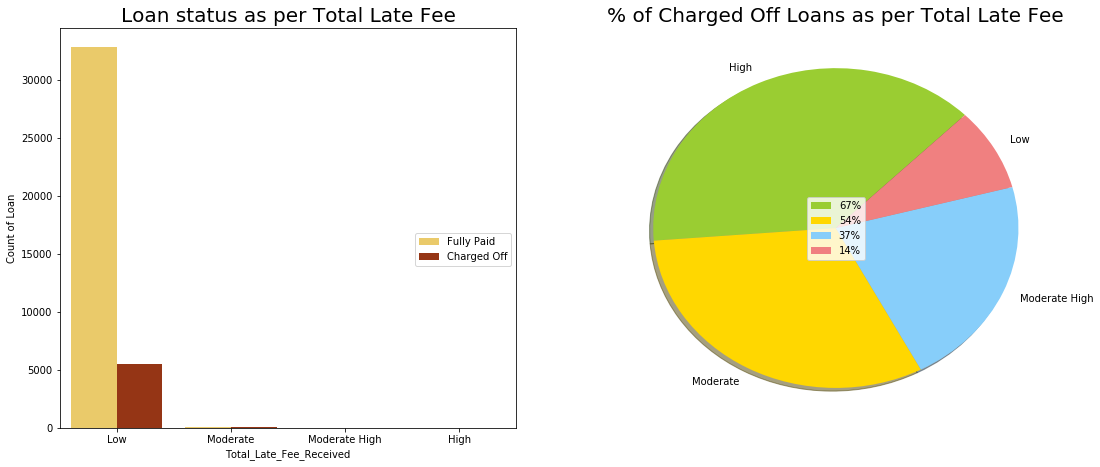

Total_Late_Fee_Received  Fully_Paid  Charged_Off  Total  percent_chargeoff
                  High           1            2      3          66.666667
              Moderate          67           79    146          54.109589
         Moderate High          12            7     19          36.842105
                   Low       32836         5523  38359          14.398186


In [98]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per Total_Late_Fee_Received
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(x = 'Total_Late_Fee_Received',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Total_Late_Fee_Received')
plt.ylabel('Count of Loan')
plt.title("Loan status as per Total Late Fee", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_Total_Late_Fee_Received = pd.DataFrame(loan_df.groupby(['Total_Late_Fee_Received'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_Total_Late_Fee_Received['Total'] = loan_Total_Late_Fee_Received.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_Total_Late_Fee_Received['percent_chargeoff'] = loan_Total_Late_Fee_Received.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_Total_Late_Fee_Received = loan_Total_Late_Fee_Received.sort_values(['percent_chargeoff'], ascending=[False])



#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_Total_Late_Fee_Received['Charged_Off'], loan_Total_Late_Fee_Received['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_Total_Late_Fee_Received['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_Total_Late_Fee_Received['Fully_Paid'], Total)]
Category = list(loan_Total_Late_Fee_Received['Total_Late_Fee_Received'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per Total_Late_Fee_Received
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per Total Late Fee", size = 20)

plt.show()
print(loan_Total_Late_Fee_Received.to_string(index=False))

### Total late fee within range of 150 to 200 had a major charged off proportion of 66.66%.

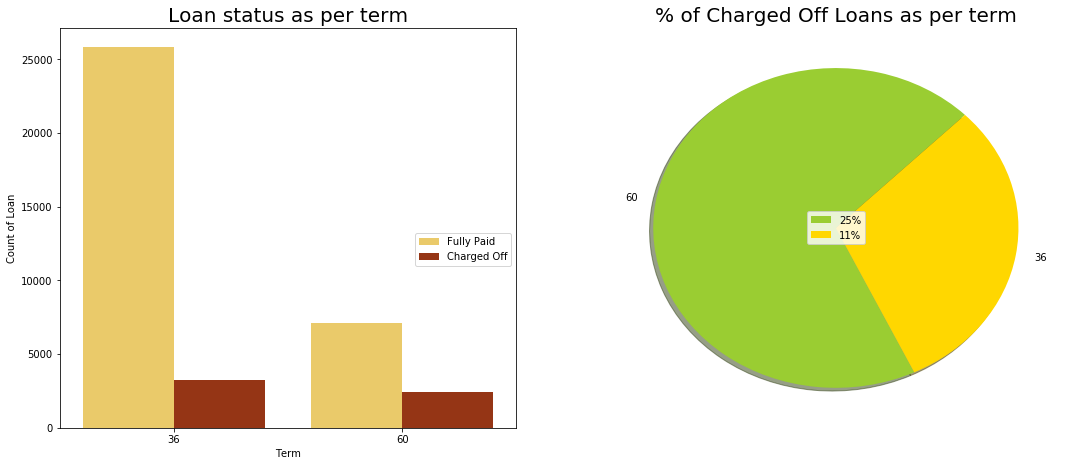

term  Fully_Paid  Charged_Off  Total  percent_chargeoff
  60        7081         2397   9478          25.290146
  36       25835         3214  29049          11.064064


In [99]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per term
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(x = 'term',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Term')
plt.ylabel('Count of Loan')
plt.title("Loan status as per term", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_term = pd.DataFrame(loan_df.groupby(['term'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_term['Total'] = loan_term.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_term['percent_chargeoff'] = loan_term.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_term = loan_term.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_term['Charged_Off'], loan_term['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_term['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_term['Fully_Paid'], Total)]
Category = list(loan_term['term'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per term
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per term", size = 20)

plt.show()
print(loan_term.to_string(index=False))

###  60 months term had a major charged off proportion of 25.29%.

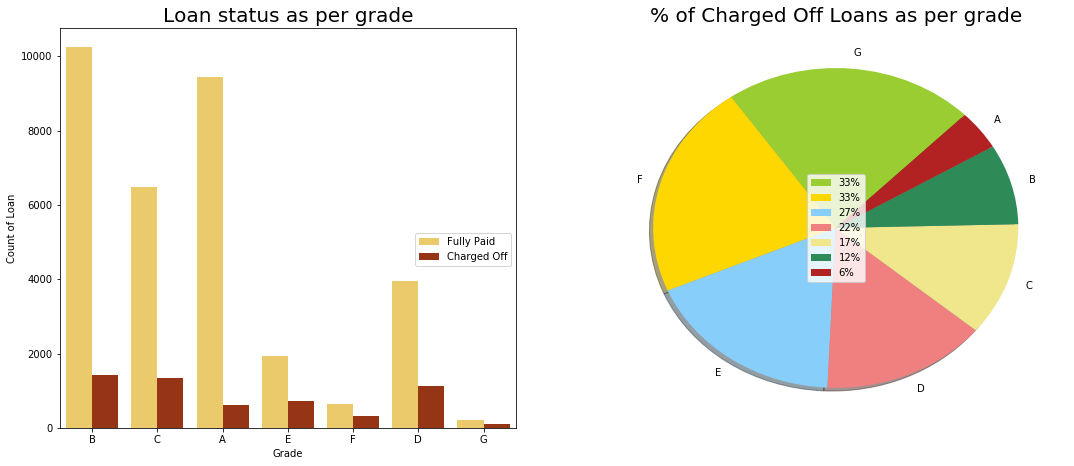

grade  Fully_Paid  Charged_Off  Total  percent_chargeoff
   G         198           99    297          33.333333
   F         654          316    970          32.577320
   E        1941          711   2652          26.809955
   D        3954         1115   5069          21.996449
   C        6477         1343   7820          17.173913
   B       10249         1425  11674          12.206613
   A        9443          602  10045           5.993031


In [100]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per grade
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(x = 'grade',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Grade')
plt.ylabel('Count of Loan')
plt.title("Loan status as per grade", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_grade = pd.DataFrame(loan_df.groupby(['grade'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_grade['Total'] = loan_grade.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_grade['percent_chargeoff'] = loan_grade.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_grade = loan_grade.sort_values(['percent_chargeoff'], ascending=[False])



#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_grade['Charged_Off'], loan_grade['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_grade['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_grade['Fully_Paid'], Total)]
Category = list(loan_grade['grade'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per grade
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per grade", size = 20)

plt.show()
print(loan_grade.to_string(index=False))

### Grade G had a major charged off proportion of 33.33%.

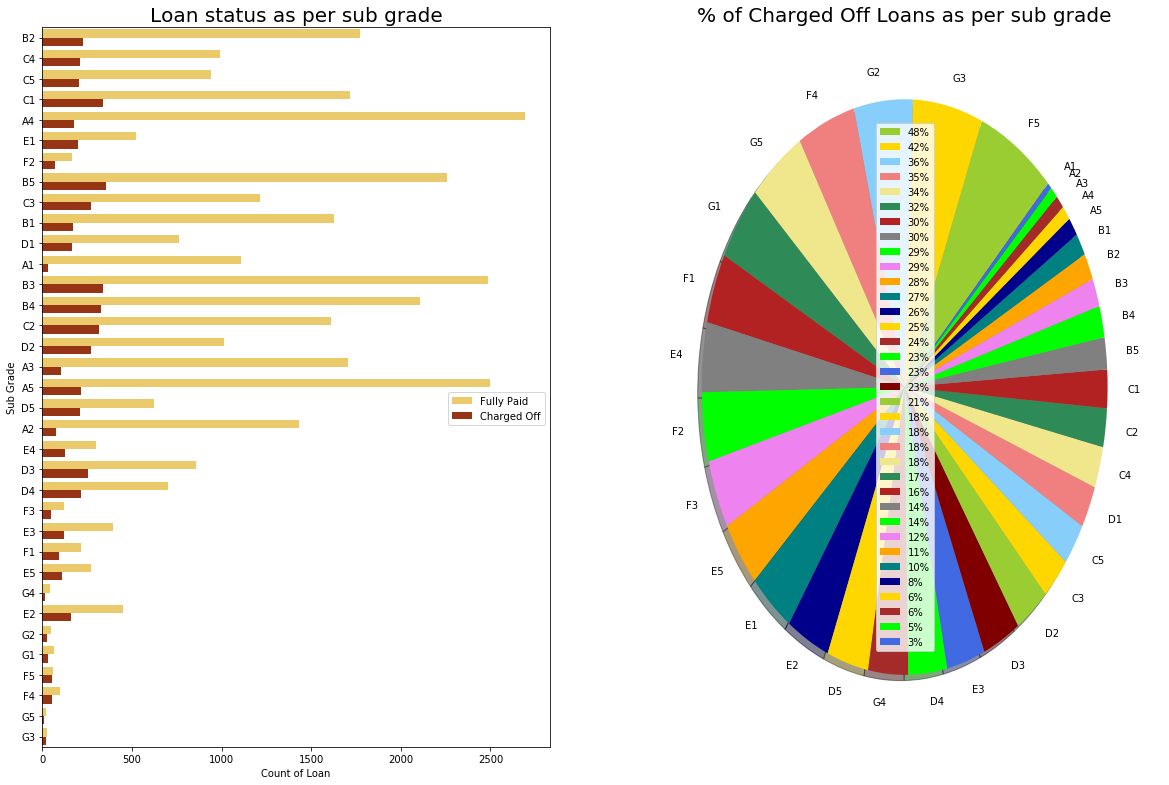

sub_grade  Fully_Paid  Charged_Off  Total  percent_chargeoff
      F5          59           54    113          47.787611
      G3          26           19     45          42.222222
      G2          49           27     76          35.526316
      F4          96           52    148          35.135135
      G5          19           10     29          34.482759
      G1          63           30     93          32.258065
      F1         213           91    304          29.934211
      E4         298          126    424          29.716981
      F2         163           68    231          29.437229
      F3         123           51    174          29.310345
      E5         274          108    382          28.272251
      E1         524          198    722          27.423823
      E2         451          160    611          26.186579
      D5         623          209    832          25.120192
      G4          41           13     54          24.074074
      D4         701          215    91

In [101]:
plt.subplots(figsize = (20,45))

#Plot 1: Loan status as per sub_grade
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(y = 'sub_grade',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.ylabel('Sub Grade')
plt.xlabel('Count of Loan')
plt.title("Loan status as per sub grade", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_sub_grade = pd.DataFrame(loan_df.groupby(['sub_grade'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_sub_grade['Total'] = loan_sub_grade.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_sub_grade['percent_chargeoff'] = loan_sub_grade.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_sub_grade = loan_sub_grade.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_sub_grade['Charged_Off'], loan_sub_grade['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_sub_grade['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_sub_grade['Fully_Paid'], Total)]
Category = list(loan_sub_grade['sub_grade'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per sub_grade
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per sub grade", size = 20)

plt.show()
print(loan_sub_grade.to_string(index=False))

###  Sub Grade F5 had a major charged off proportion of 47.78%.

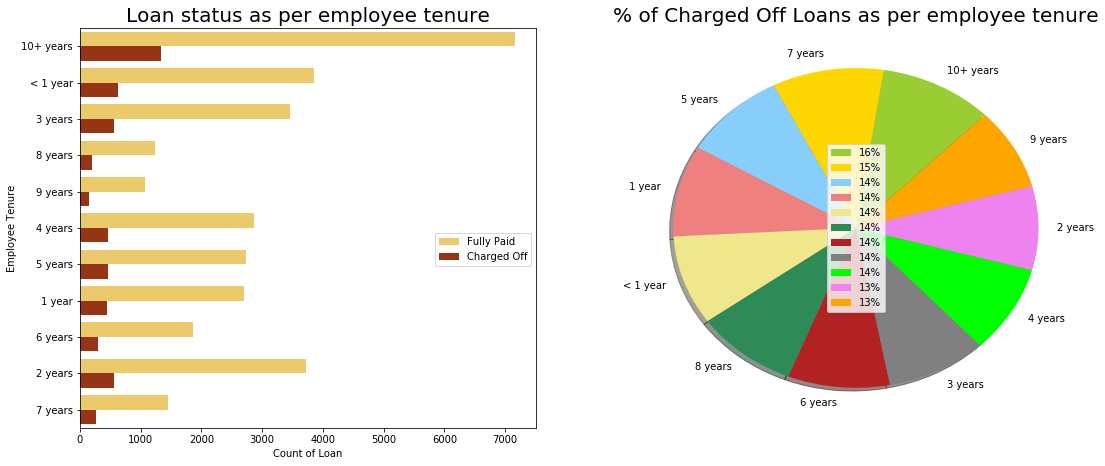

emp_length  Fully_Paid  Charged_Off  Total  percent_chargeoff
10+ years        7157         1330   8487          15.671026
  7 years        1445          263   1708          15.398126
  5 years        2733          457   3190          14.326019
   1 year        2710          453   3163          14.321846
 < 1 year        3861          635   4496          14.123665
  8 years        1231          202   1433          14.096301
  6 years        1860          305   2165          14.087760
  3 years        3453          555   4008          13.847305
  4 years        2875          460   3335          13.793103
  2 years        3720          566   4286          13.205786
  9 years        1068          158   1226          12.887439


In [102]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per emp_length
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(y = 'emp_length',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.ylabel('Employee Tenure')
plt.xlabel('Count of Loan')
plt.title("Loan status as per employee tenure", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#To calculate count of charged off and fully paid loans
loan_emp_length = pd.DataFrame(loan_df.groupby(['emp_length'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_emp_length['Total'] = loan_emp_length.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_emp_length['percent_chargeoff'] = loan_emp_length.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_emp_length = loan_emp_length.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_emp_length['Charged_Off'], loan_emp_length['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_emp_length['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_emp_length['Fully_Paid'], Total)]
Category = list(loan_emp_length['emp_length'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per emp_length
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per employee tenure", size = 20)

plt.show()
print(loan_emp_length.to_string(index=False))

### Applicant having work experience of 10+ years had a major charged off proportion of 15.67%.

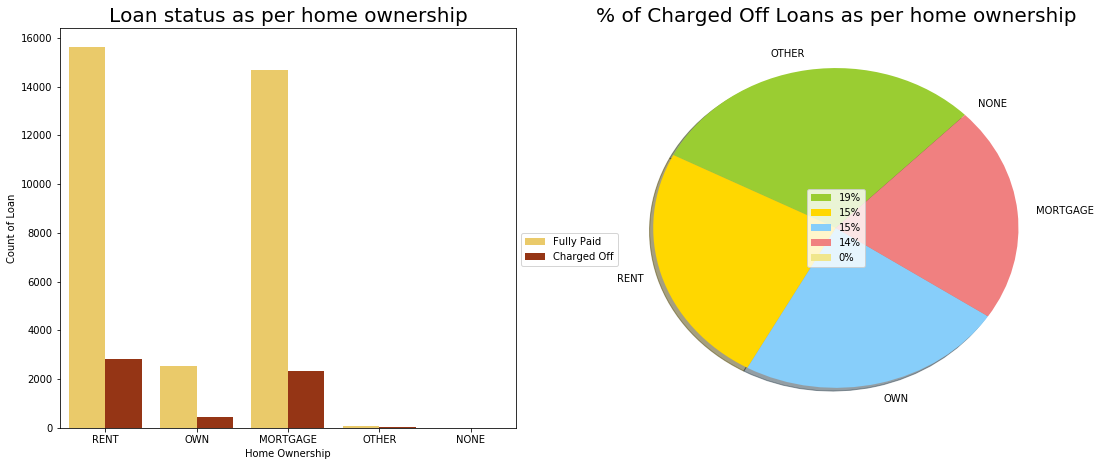

home_ownership  Fully_Paid  Charged_Off  Total  percent_chargeoff
        OTHER          78           18     96          18.750000
         RENT       15619         2829  18448          15.334996
          OWN        2529          441   2970          14.848485
     MORTGAGE       14687         2323  17010          13.656673
         NONE           3            0      3           0.000000


In [103]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per home_ownership
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(x = 'home_ownership',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Home Ownership')
plt.ylabel('Count of Loan')
plt.title("Loan status as per home ownership", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_home_ownership = pd.DataFrame(loan_df.groupby(['home_ownership'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_home_ownership['Total'] = loan_home_ownership.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_home_ownership['percent_chargeoff'] = loan_home_ownership.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_home_ownership = loan_home_ownership.sort_values(['percent_chargeoff'], ascending=[False])



#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_home_ownership['Charged_Off'], loan_home_ownership['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_home_ownership['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_home_ownership['Fully_Paid'], Total)]
Category = list(loan_home_ownership['home_ownership'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per home_ownership
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per home ownership", size = 20)

plt.show()
print(loan_home_ownership.to_string(index=False))

### Applicant with home ownership as other had a major charged off proportion of 18.75%.

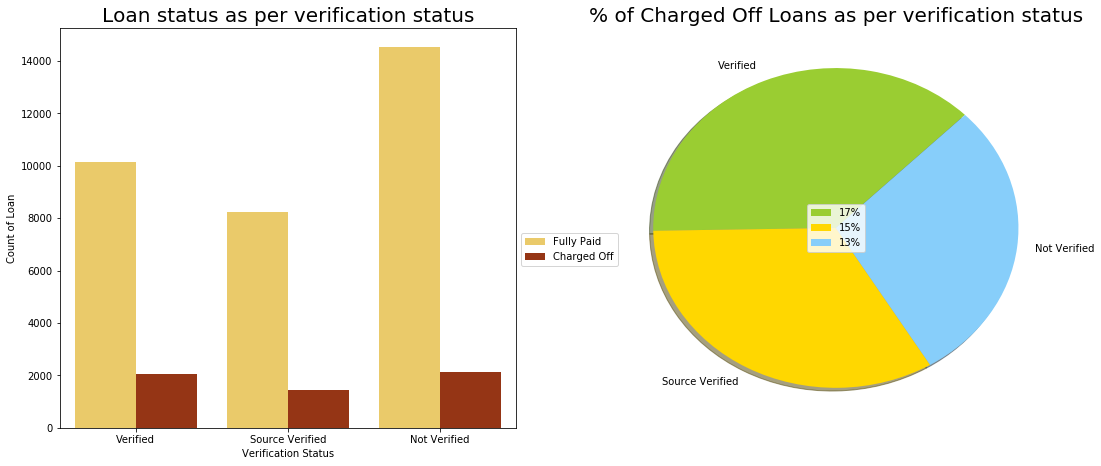

verification_status  Fully_Paid  Charged_Off  Total  percent_chargeoff
          Verified       10151         2045  12196          16.767793
   Source Verified        8235         1431   9666          14.804469
      Not Verified       14530         2135  16665          12.811281


In [104]:
plt.subplots(figsize = (18,25))

#Plot 1: Loan status as per verification_status
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(x = 'verification_status',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Verification Status')
plt.ylabel('Count of Loan')
plt.title("Loan status as per verification status", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_verification_status = pd.DataFrame(loan_df.groupby(['verification_status'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_verification_status['Total'] = loan_verification_status.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_verification_status['percent_chargeoff'] = loan_verification_status.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_verification_status = loan_verification_status.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_verification_status['Charged_Off'], loan_verification_status['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_verification_status['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_verification_status['Fully_Paid'], Total)]
Category = list(loan_verification_status['verification_status'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per verification_status
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per verification status", size = 20)

plt.show()
print(loan_verification_status.to_string(index=False))

### The verified loans had a major charged off proportion of 16.76%.

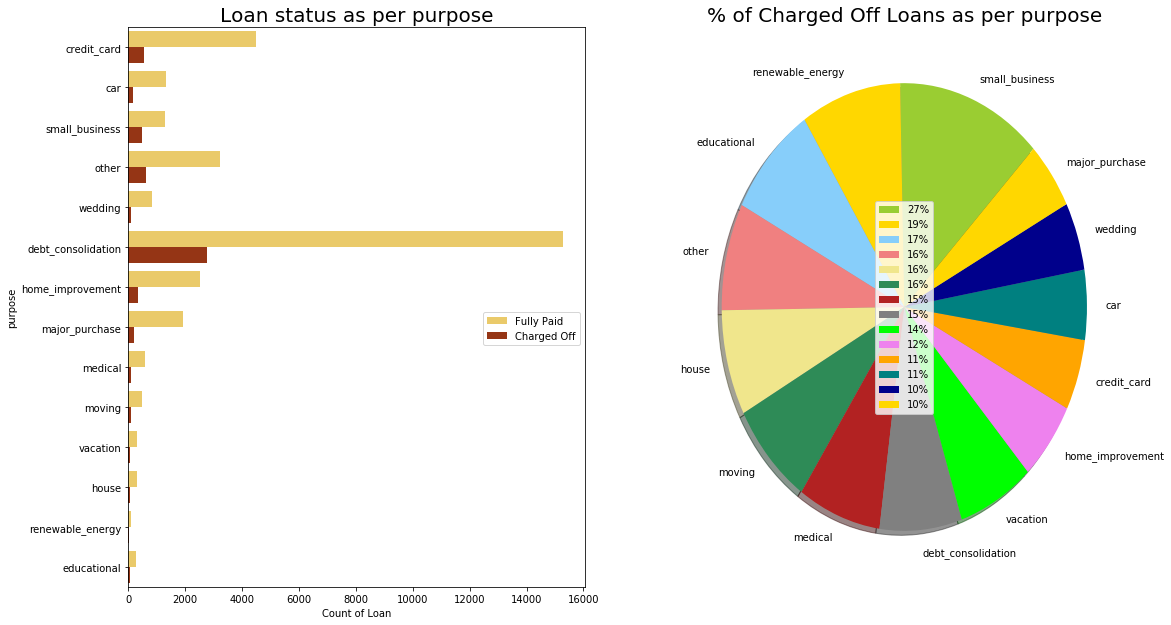

purpose  Fully_Paid  Charged_Off  Total  percent_chargeoff
    small_business        1278          475   1753          27.096406
  renewable_energy          83           19    102          18.627451
       educational         266           56    322          17.391304
             other        3223          629   3852          16.329180
             house         308           59    367          16.076294
            moving         482           92    574          16.027875
           medical         574          105    679          15.463918
debt_consolidation       15281         2762  18043          15.307876
          vacation         321           53    374          14.171123
  home_improvement        2526          344   2870          11.986063
       credit_card        4484          541   5025          10.766169
               car        1338          159   1497          10.621242
           wedding         829           96    925          10.378378
    major_purchase        1923 

In [105]:
plt.subplots(figsize = (18,35))

#Plot 1: Loan status as per purpose
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(y = 'purpose',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.ylabel('purpose')
plt.xlabel('Count of Loan')
plt.title("Loan status as per purpose", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_purpose = pd.DataFrame(loan_df.groupby(['purpose'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_purpose['Total'] = loan_purpose.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_purpose['percent_chargeoff'] = loan_purpose.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_purpose = loan_purpose.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_purpose['Charged_Off'], loan_purpose['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_purpose['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_purpose['Fully_Paid'], Total)]
Category = list(loan_purpose['purpose'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per purpose
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per purpose", size = 20)

plt.show()
print(loan_purpose.to_string(index=False))

### Loan for small business had a major charged off proportion of 27.09%.

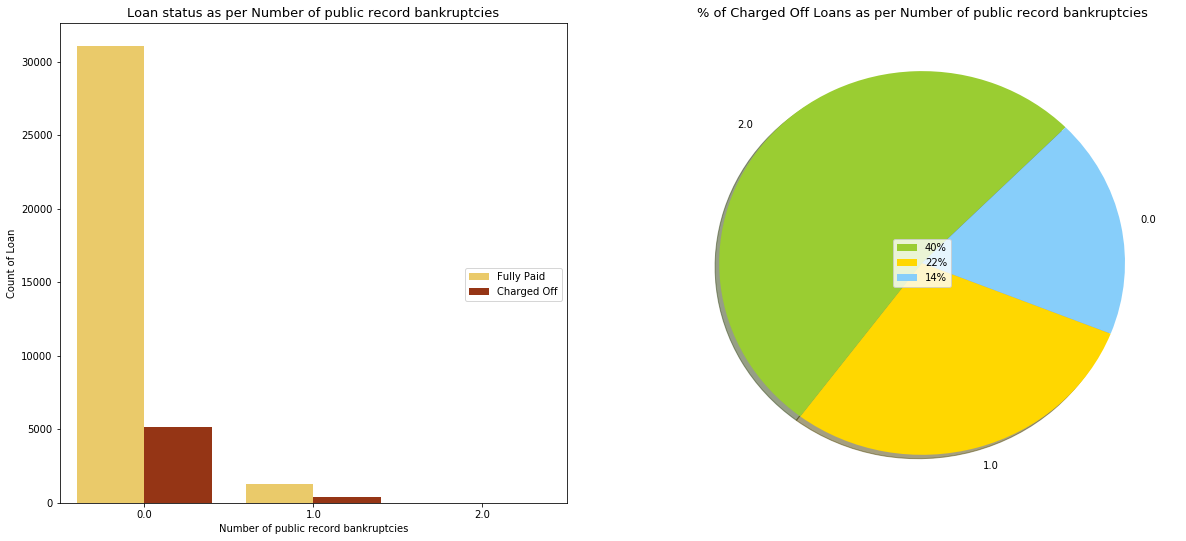

pub_rec_bankruptcies  Fully_Paid  Charged_Off    Total  percent_chargeoff
                 2.0           3            2      5.0          40.000000
                 1.0        1270          366   1636.0          22.371638
                 0.0       31064         5125  36189.0          14.161762


In [106]:
plt.subplots(figsize = (20,30))

#Plot 1: Loan status as per pub_rec_bankruptcies
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(x = 'pub_rec_bankruptcies',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Count of Loan')
plt.title("Loan status as per Number of public record bankruptcies", size = 13)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_pub_rec_bankruptcies = pd.DataFrame(loan_df.groupby(['pub_rec_bankruptcies'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_pub_rec_bankruptcies['Total'] = loan_pub_rec_bankruptcies.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_pub_rec_bankruptcies['percent_chargeoff'] = loan_pub_rec_bankruptcies.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_pub_rec_bankruptcies = loan_pub_rec_bankruptcies.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_pub_rec_bankruptcies['Charged_Off'], loan_pub_rec_bankruptcies['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_pub_rec_bankruptcies['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_pub_rec_bankruptcies['Fully_Paid'], Total)]
Category = list(loan_pub_rec_bankruptcies['pub_rec_bankruptcies'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per pub_rec_bankruptcies
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per Number of public record bankruptcies", size = 13)

plt.show()
print(loan_pub_rec_bankruptcies.to_string(index=False))

### Number of public record bankruptcies of 2.0 had a major charged off proportion of 40%.

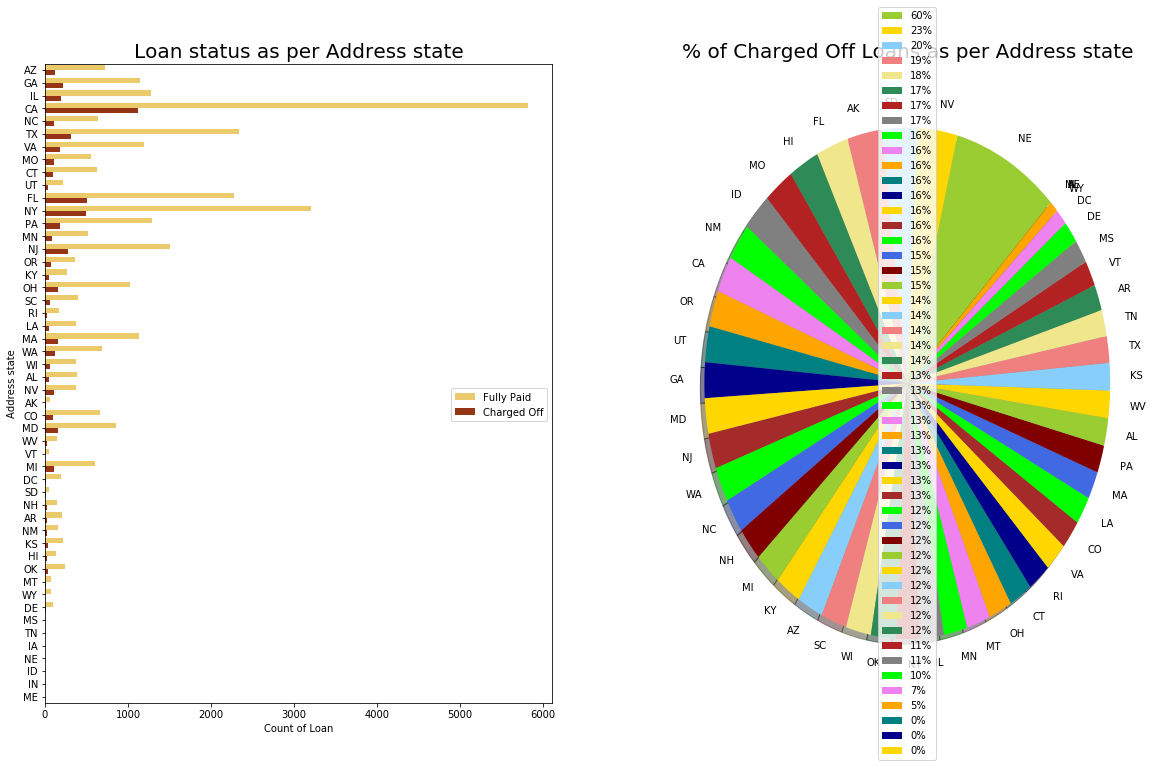

addr_state  Fully_Paid  Charged_Off  Total  percent_chargeoff
       NE           2            3      5          60.000000
       NV         370          108    478          22.594142
       SD          49           12     61          19.672131
       AK          63           15     78          19.230769
       FL        2277          503   2780          18.093525
       HI         137           28    165          16.969697
       MO         556          113    669          16.890882
       ID           5            1      6          16.666667
       NM         153           30    183          16.393443
       CA        5818         1124   6942          16.191299
       OR         364           70    434          16.129032
       UT         212           40    252          15.873016
       GA        1144          215   1359          15.820456
       MD         860          161   1021          15.768854
       NJ        1507          278   1785          15.574230
       WA         690  

In [107]:
plt.subplots(figsize = (20,40))

#Plot 1: Loan status as per addr_state
plt.subplot(3, 2, 1)
Plot1 = sns.countplot(y = 'addr_state',hue = 'loan_status', palette='afmhot_r', data = loan_df)
plt.ylabel('Address state')
plt.xlabel('Count of Loan')
plt.title("Loan status as per Address state", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')


#To calculate count of charged off and fully paid loans
loan_addr_state = pd.DataFrame(loan_df.groupby(['addr_state'])['Fully_Paid','Charged_Off'].sum()).reset_index()
loan_addr_state['Total'] = loan_addr_state.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
loan_addr_state['percent_chargeoff'] = loan_addr_state.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
loan_addr_state = loan_addr_state.sort_values(['percent_chargeoff'], ascending=[False])


#To create percentage of charged off and fully paid loans
Total = [a+b for a,b in zip(loan_addr_state['Charged_Off'], loan_addr_state['Fully_Paid'])]
Charged_Off = [a / b * 100 for a,b in zip(loan_addr_state['Charged_Off'], Total)]
Fully_Paid = [a / b * 100 for a,b in zip(loan_addr_state['Fully_Paid'], Total)]
Category = list(loan_addr_state['addr_state'])

#To convert Charged_Off to percentage
a = Charged_Off
rounded_Charged_Off = [round(x) for x in a]
label = list(map("{}%".format, rounded_Charged_Off))


#Plot 2: Percentage of Charged Off Loans as per addr_state
plt.subplot(3, 2, 2)
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','seagreen','firebrick','grey',
         'lime','violet','orange','teal','darkblue','gold','brown','lime','royalblue','maroon']
plt.pie(Charged_Off, labels=Category, startangle=45, colors = color, shadow=True)
plt.legend(label, loc="center")
plt.title("% of Charged Off Loans as per Address state", size = 20)

plt.show()
print(loan_addr_state.to_string(index=False))

### Address state NE (Nebraska) had a major charged off proportion of 60%.

In [108]:
# To identify the major purpose of loan by applicant
Major_Purpose = ['debt_consolidation','credit_card','other','home_improvement','major_purchase','car']
loan_df1 = loan_df[loan_df['purpose'].isin(Major_Purpose)]
loan_df1['purpose'].value_counts()

debt_consolidation    18043
credit_card            5025
other                  3852
home_improvement       2870
major_purchase         2144
car                    1497
Name: purpose, dtype: int64

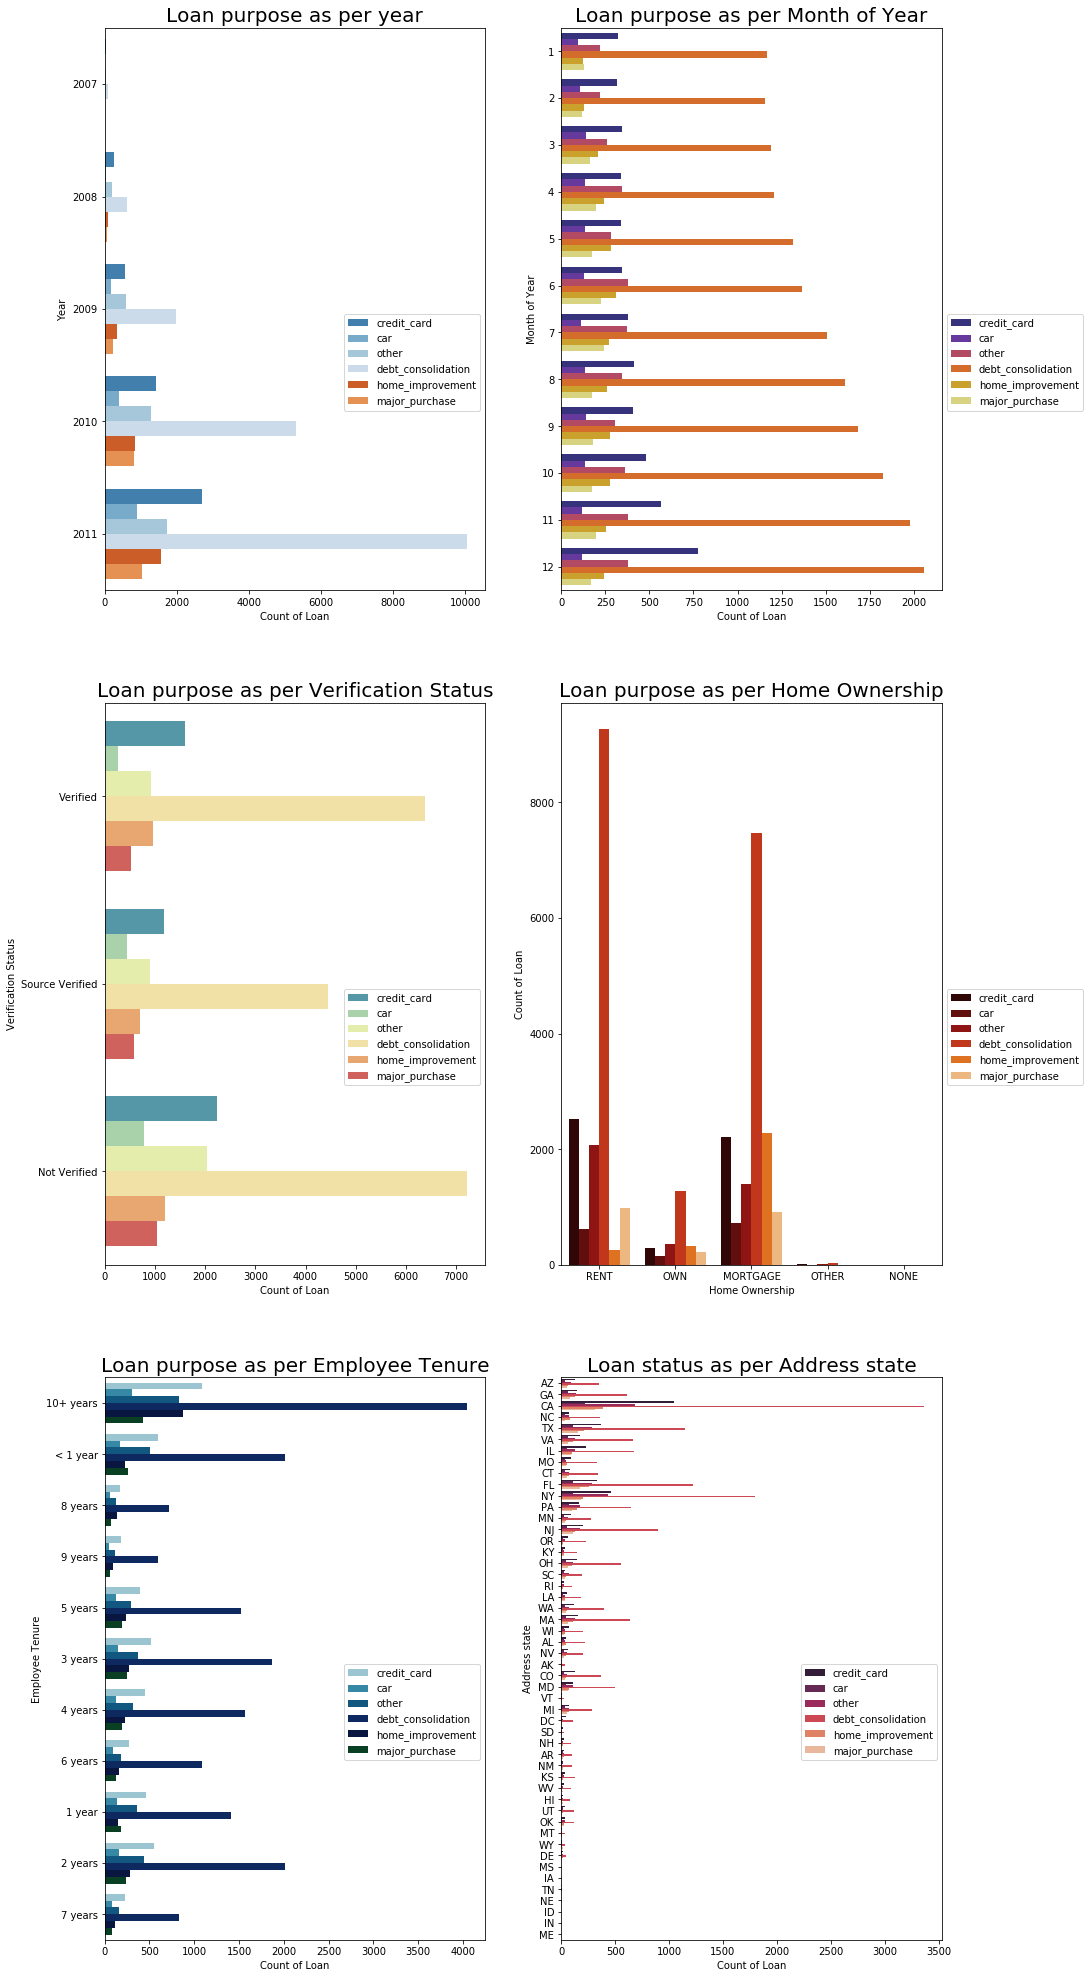

In [109]:
# Purpose of loan as per year, month, Verification Status, Home Ownership, Employee Tenure and Address state
plt.subplots(figsize = (15,60))

#Plot 1: Loan purpose as per year
plt.subplot(5, 2, 1)
Plot1 = sns.countplot(y = 'year', hue = 'purpose', palette='tab20c', data = loan_df1)
plt.ylabel('Year')
plt.xlabel('Count of Loan')
plt.title("Loan purpose as per year", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#Plot 2: Loan purpose as per Month of Year
plt.subplot(5, 2, 2)
Plot1 = sns.countplot(y = 'month', hue = 'purpose', palette='CMRmap', data = loan_df1)
plt.ylabel('Month of Year')
plt.xlabel('Count of Loan')
plt.title("Loan purpose as per Month of Year", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#Plot 3: Loan purpose as per Verification Status
plt.subplot(5, 2, 3)
Plot1 = sns.countplot(y = 'verification_status', hue = 'purpose', palette='Spectral_r', data = loan_df1)
plt.ylabel('Verification Status')
plt.xlabel('Count of Loan')
plt.title("Loan purpose as per Verification Status", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#Plot 4: Loan purpose as per Home Ownership
plt.subplot(5, 2, 4)
Plot1 = sns.countplot(x = 'home_ownership', hue = 'purpose', palette='gist_heat', data = loan_df1)
plt.xlabel('Home Ownership')
plt.ylabel('Count of Loan')
plt.title("Loan purpose as per Home Ownership", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#Plot 5: Loan purpose as per Employee Tenure
plt.subplot(5, 2, 5)
Plot1 = sns.countplot(y = 'emp_length', hue = 'purpose', palette='ocean_r', data = loan_df1)
plt.ylabel('Employee Tenure')
plt.xlabel('Count of Loan')
plt.title("Loan purpose as per Employee Tenure", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#Plot 6: Loan purpose as per Address state
plt.subplot(5, 2, 6)
Plot1 = sns.countplot(y = 'addr_state', hue = 'purpose', palette='rocket', data = loan_df1)
plt.ylabel('Address state')
plt.xlabel('Count of Loan')
plt.title("Loan status as per Address state", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

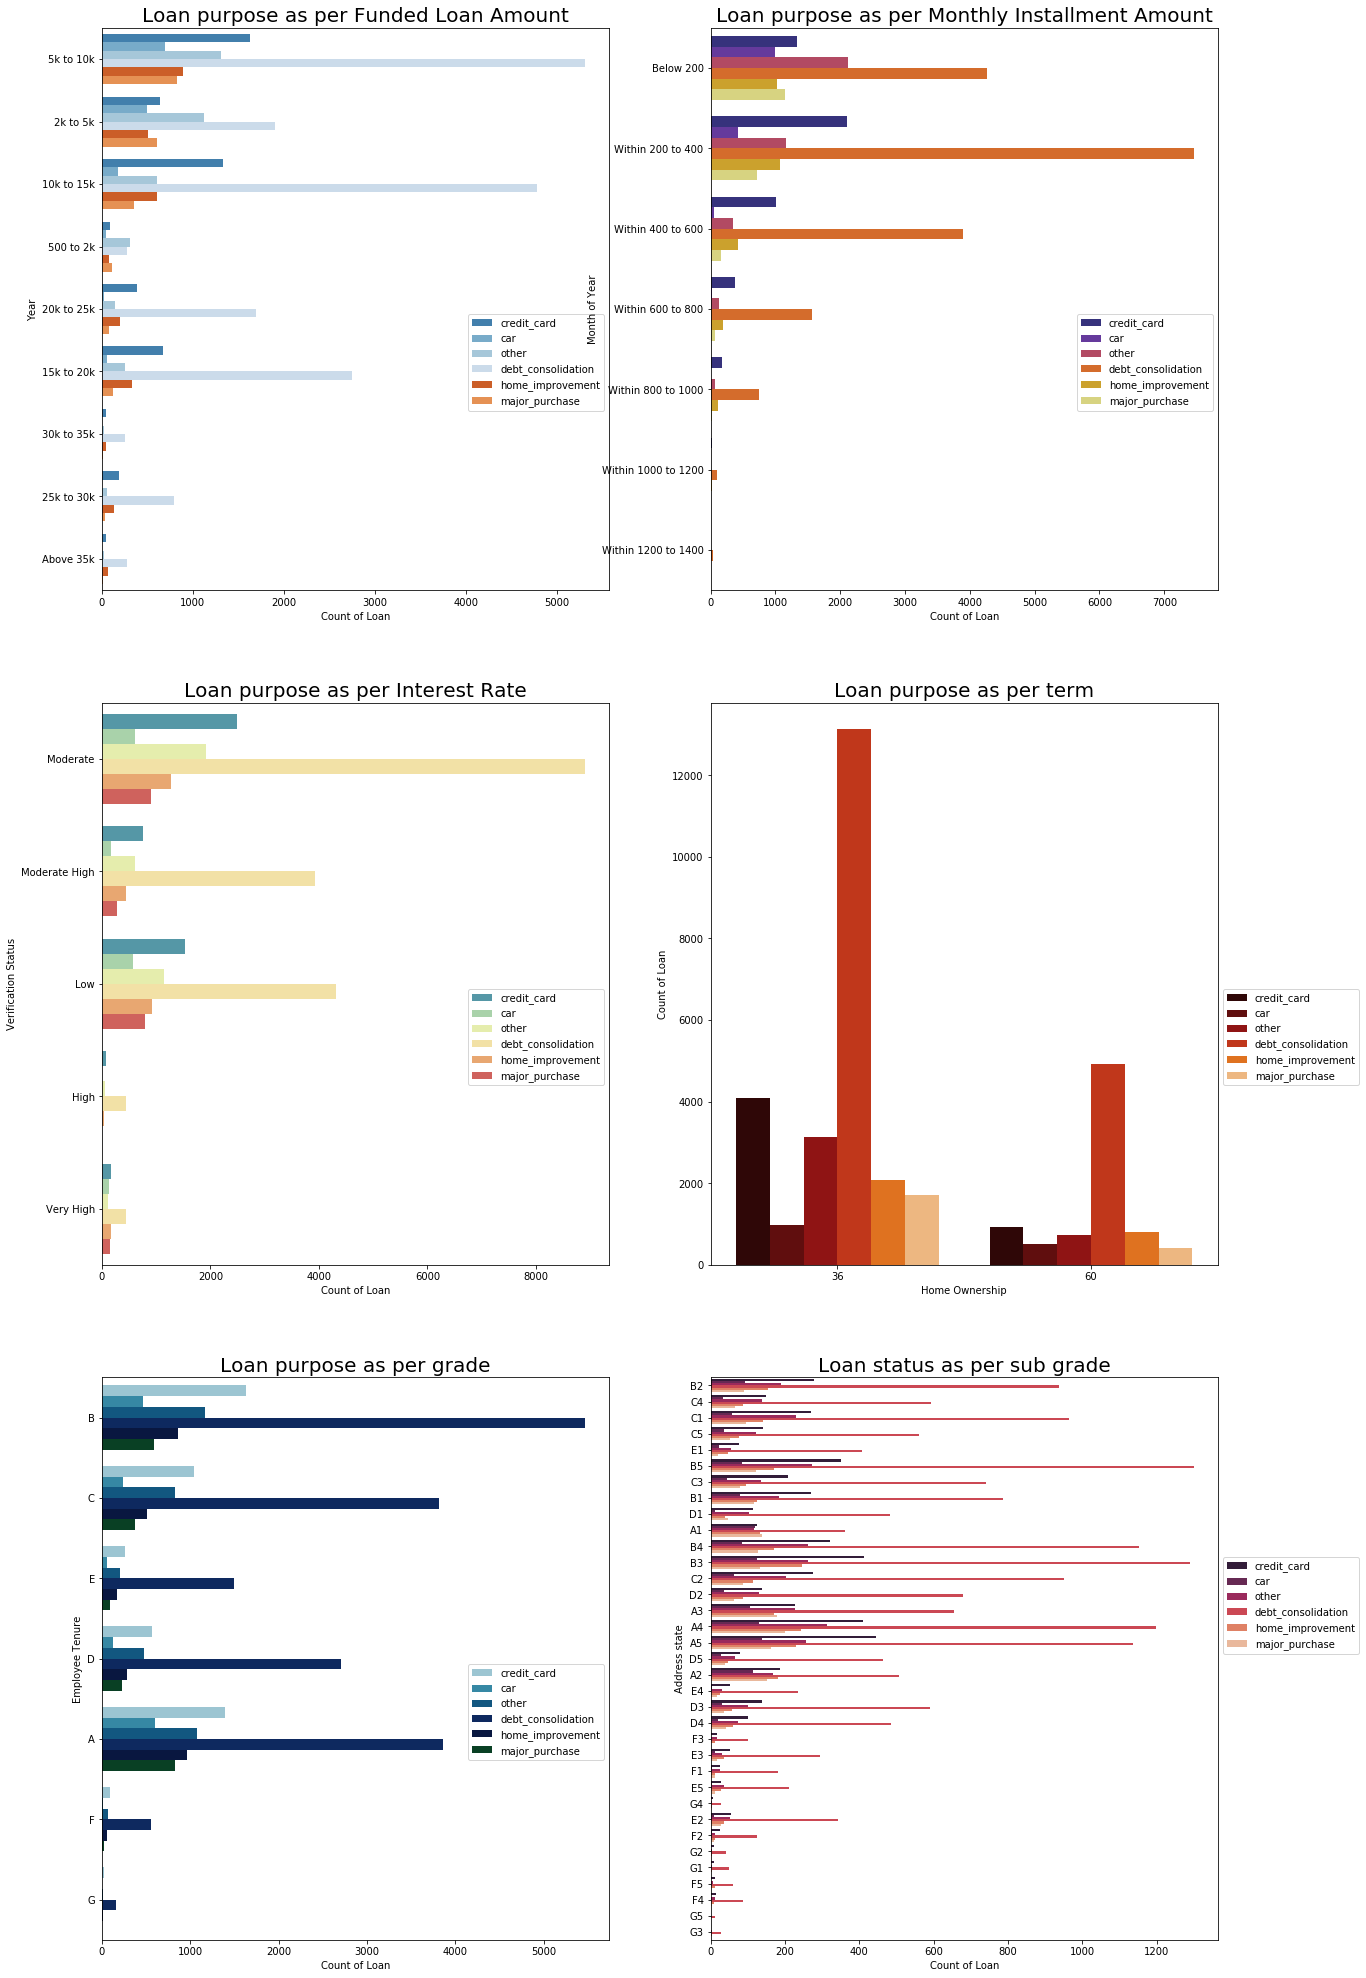

In [110]:
# Purpose of loan as per Funded Loan Amount, Monthly Installment Amount ,Interest Rate, term, grade and sub grade

plt.subplots(figsize = (20,60))

#Plot 1: Loan purpose as per Funded Loan Amount
plt.subplot(5, 2, 1)
Plot1 = sns.countplot(y = 'Funded_Loan_Amount', hue = 'purpose', palette='tab20c', data = loan_df1)
plt.ylabel('Year')
plt.xlabel('Count of Loan')
plt.title("Loan purpose as per Funded Loan Amount", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#Plot 2: Loan purpose as per Monthly Installment Amount 
plt.subplot(5, 2, 2)
Plot1 = sns.countplot(y = 'Monthly_Installment_Amount', hue = 'purpose', palette='CMRmap', data = loan_df1)
plt.ylabel('Month of Year')
plt.xlabel('Count of Loan')
plt.title("Loan purpose as per Monthly Installment Amount", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#Plot 3: Loan purpose as per Interest Rate
plt.subplot(5, 2, 3)
Plot1 = sns.countplot(y = 'Interest_Rate', hue = 'purpose', palette='Spectral_r', data = loan_df1)
plt.ylabel('Verification Status')
plt.xlabel('Count of Loan')
plt.title("Loan purpose as per Interest Rate", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#Plot 4: Loan purpose as per term

plt.subplot(5, 2, 4)
Plot1 = sns.countplot(x = 'term', hue = 'purpose', palette='gist_heat', data = loan_df1)
plt.xlabel('Home Ownership')
plt.ylabel('Count of Loan')
plt.title("Loan purpose as per term", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#Plot 5: Loan purpose as per grade
plt.subplot(5, 2, 5)
Plot1 = sns.countplot(y = 'grade', hue = 'purpose', palette='ocean_r', data = loan_df1)
plt.ylabel('Employee Tenure')
plt.xlabel('Count of Loan')
plt.title("Loan purpose as per grade", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

#Plot 6: Loan purpose as per sub grade
plt.subplot(5, 2, 6)
Plot1 = sns.countplot(y = 'sub_grade', hue = 'purpose', palette='rocket', data = loan_df1)
plt.ylabel('Address state')
plt.xlabel('Count of Loan')
plt.title("Loan status as per sub grade", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

Text(0.5,1,'Loans Charged Off as per verification status')

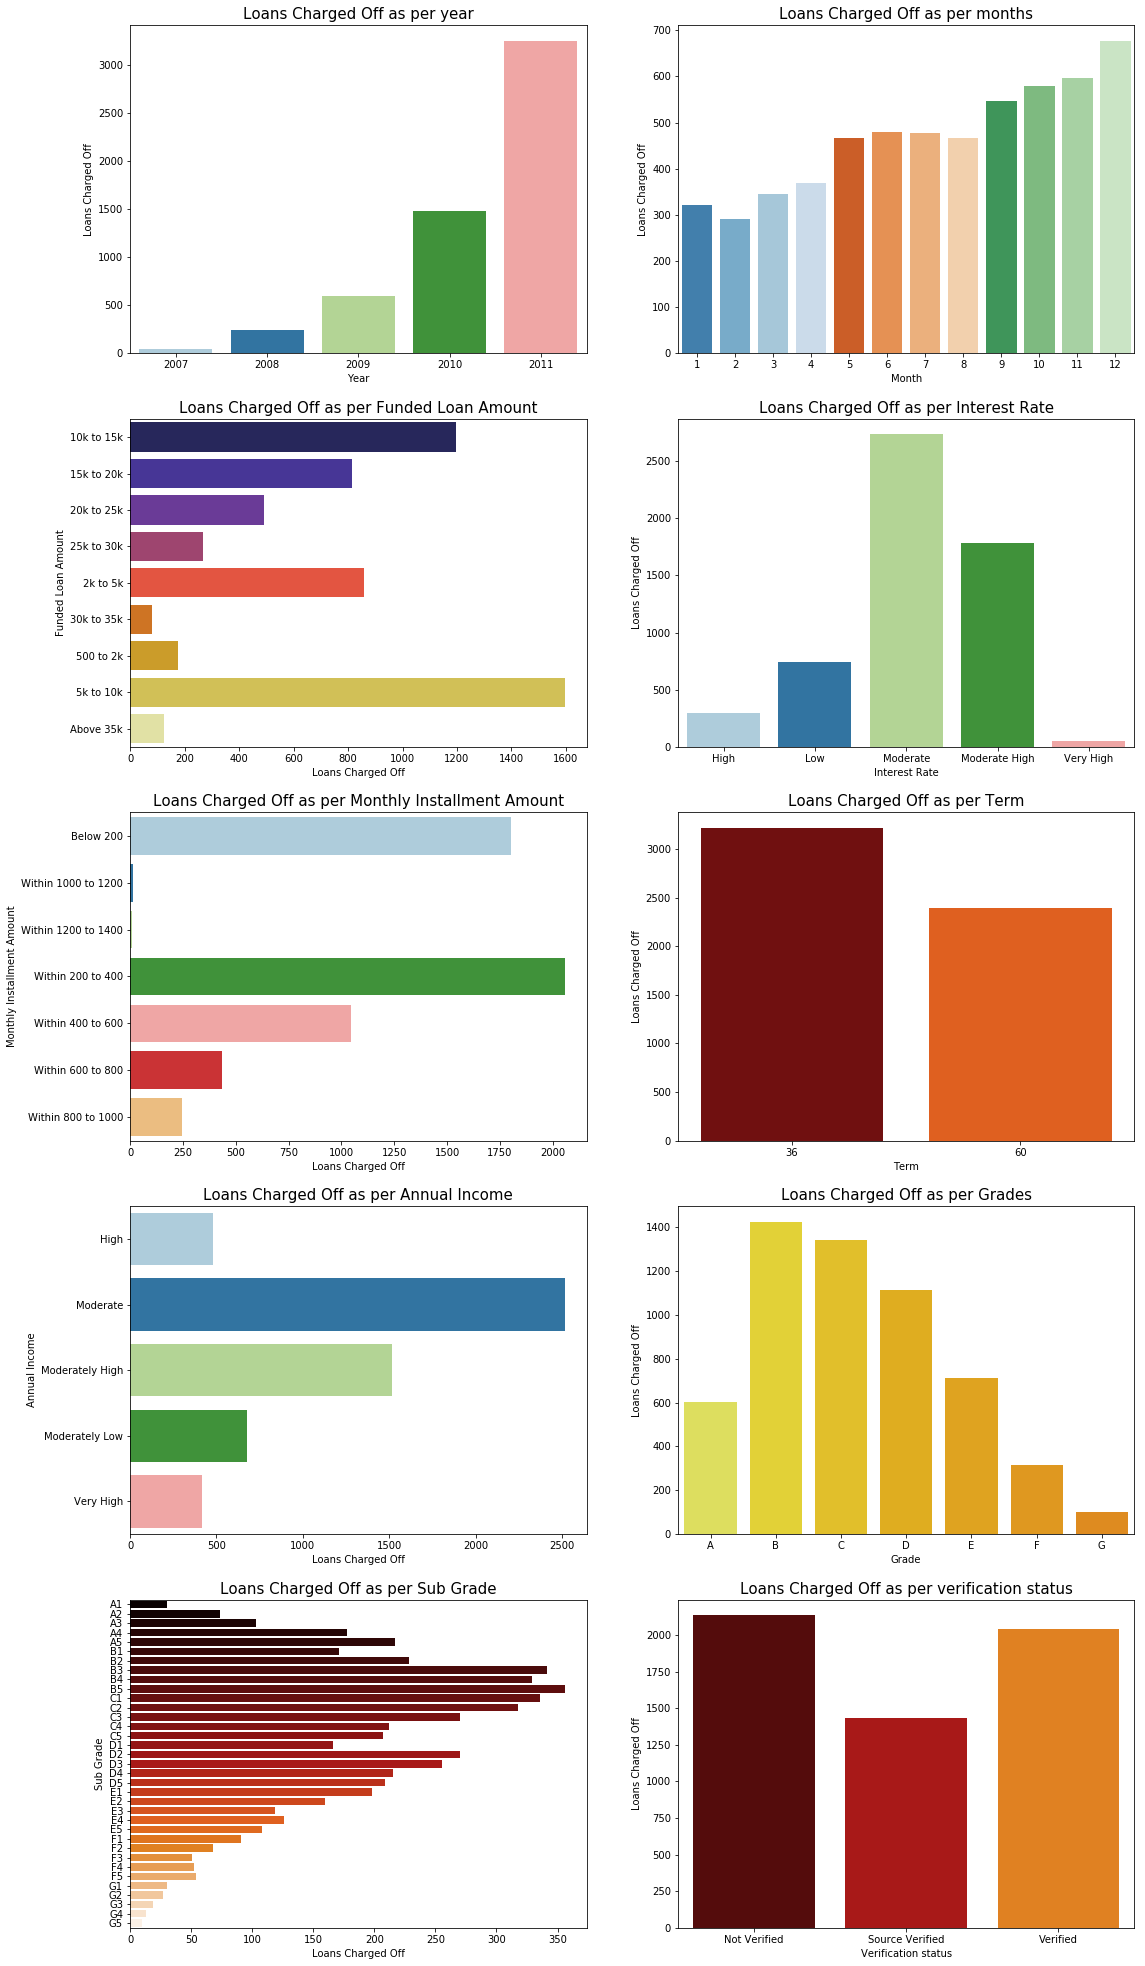

In [111]:
# Count of charged off loans as per Year, Month, Funded Loan Amount, Interest Rate, Monthly Installment Amount, Term, 
#Annual Income, Grades, Sub grades and verification status
plt.subplots(figsize = (18,35))

df1 = loan_df[loan_df.Charged_Off == 1]

#Plot 1: year
plt.subplot(5, 2, 1)
sns.countplot(x = df1.year.sort_values(),palette='Paired')
plt.xlabel('Year')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per year", size = 15)

#Plot 2: Month
plt.subplot(5, 2, 2)
sns.countplot(x = df1.month.sort_values(),palette='tab20c')
plt.xlabel('Month')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per months", size = 15)

#Plot 3: Funded Loan Amount
plt.subplot(5, 2, 3)
sns.countplot(y = df1.Funded_Loan_Amount.sort_values(),palette='CMRmap')
plt.ylabel('Funded Loan Amount')
plt.xlabel('Loans Charged Off')
plt.title("Loans Charged Off as per Funded Loan Amount", size = 15)

#Plot 4: Interest Rate
plt.subplot(5, 2, 4)
sns.countplot(x = df1.Interest_Rate.sort_values(),palette='Paired')
plt.xlabel('Interest Rate')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per Interest Rate", size = 15)

#Plot 5: Monthly Installment Amount
plt.subplot(5, 2, 5)
sns.countplot(y = df1.Monthly_Installment_Amount.sort_values(),palette='Paired')
plt.ylabel('Monthly Installment Amount')
plt.xlabel('Loans Charged Off')
plt.title("Loans Charged Off as per Monthly Installment Amount", size = 15)

#Plot 6: Term
plt.subplot(5, 2, 6)
sns.countplot(x = df1.term.sort_values(),palette='gist_heat')
plt.xlabel('Term')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per Term", size = 15)

#Plot 7: Annual Income
plt.subplot(5, 2, 7)
sns.countplot(y = df1.Annual_Income.sort_values(),palette='Paired')
plt.ylabel('Annual Income')
plt.xlabel('Loans Charged Off')
plt.title("Loans Charged Off as per Annual Income", size = 15)

#Plot 8: Grades
plt.subplot(5, 2, 8)
sns.countplot(x = df1.grade.sort_values(), palette='Wistia')
plt.xlabel('Grade')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per Grades", size = 15)

#Plot 9: sub_grade
plt.subplot(5, 2, 9)
sns.countplot(y = df1.sub_grade.sort_values(),palette='gist_heat')
plt.ylabel('Sub Grade')
plt.xlabel('Loans Charged Off')
plt.title("Loans Charged Off as per Sub Grade", size = 15)

#Plot 10: verification_status
plt.subplot(5, 2, 10)
sns.countplot(x = df1.verification_status.sort_values(), palette='gist_heat')
plt.xlabel('Verification status')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per verification status", size = 15)

Text(0.5,1,'Loans Charged Off as per address state')

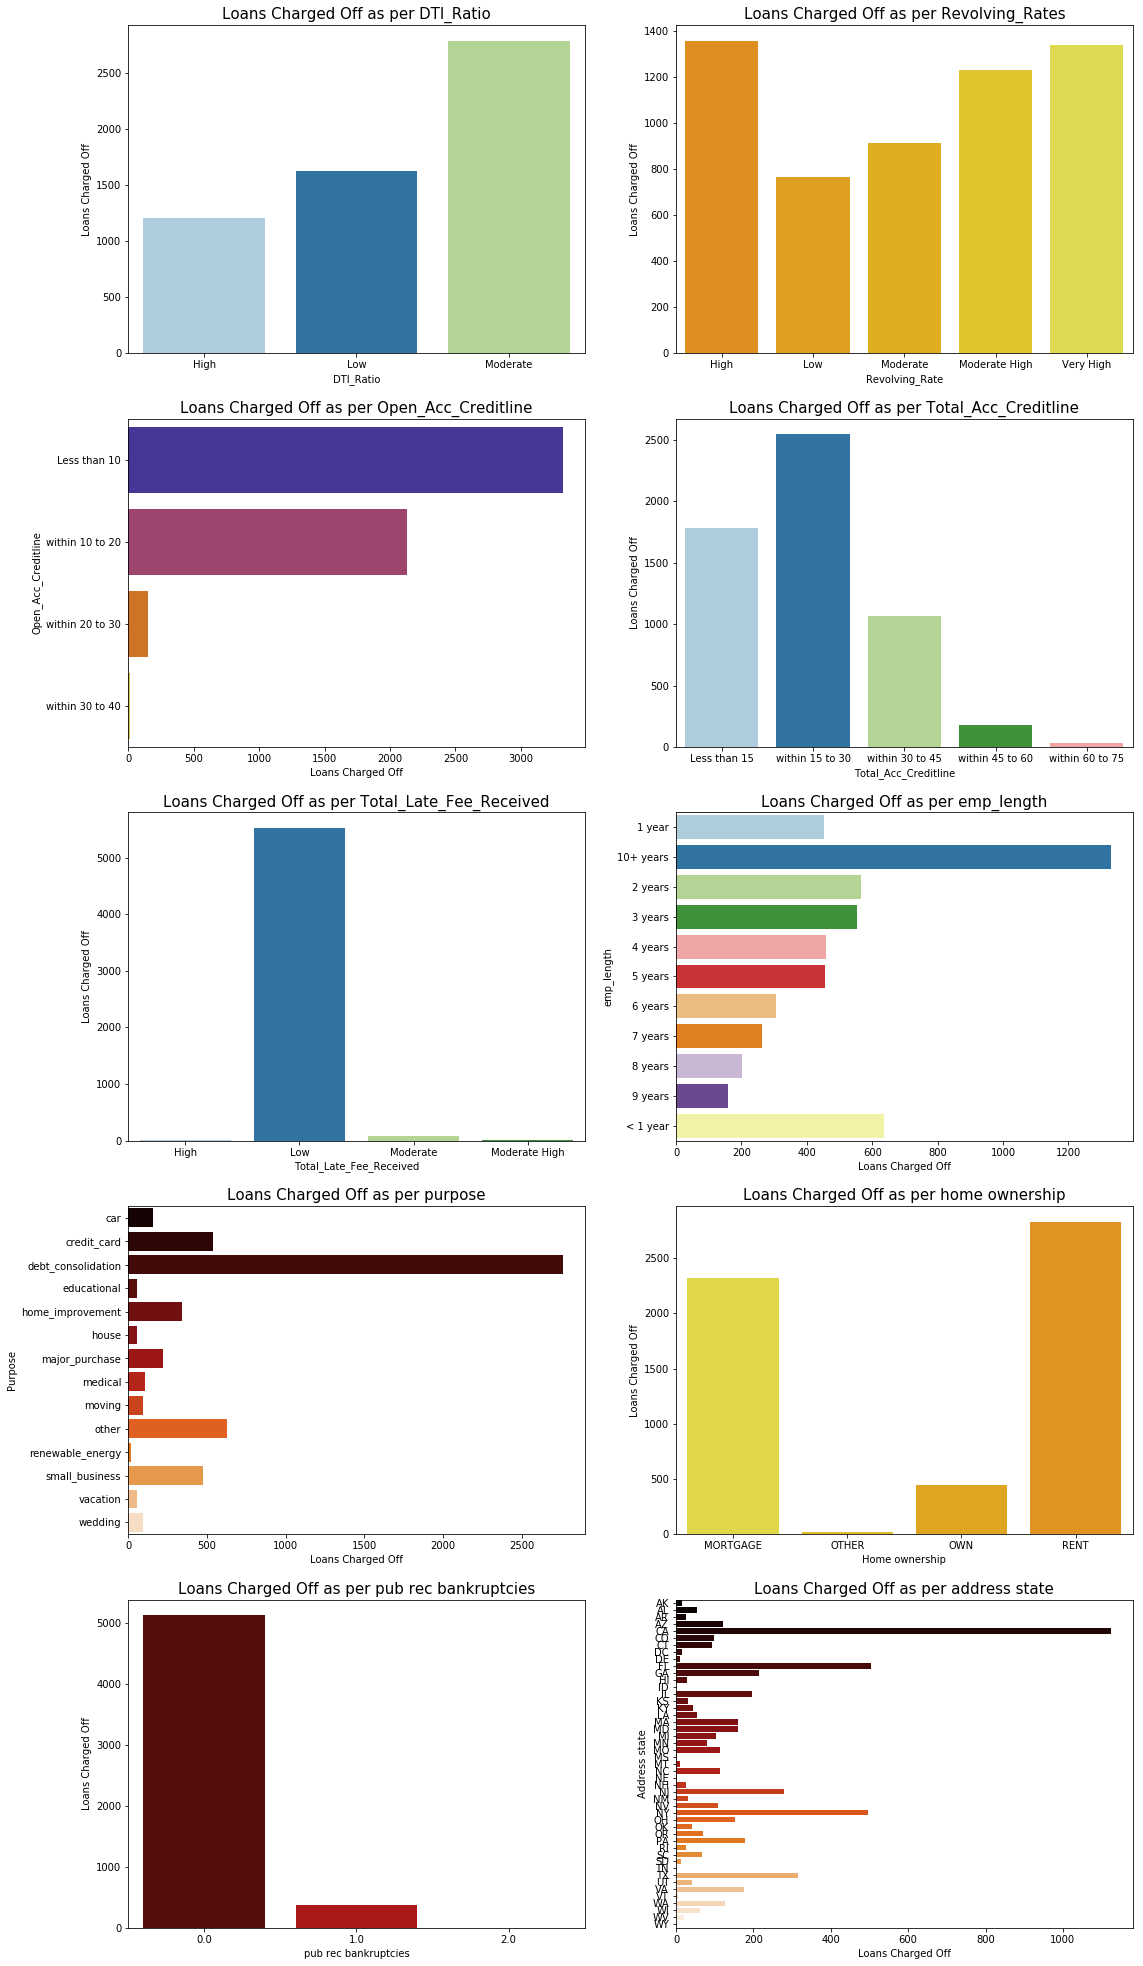

In [112]:
# Count of charged off loans as per DTI_Ratio, Revolving_Rate, Open_Acc_Creditline, Total_Acc_Creditline, Total_Late_Fee_Received,
#emp_length, purpose, home_ownership, pub_rec_bankruptcies, addr_state.

plt.subplots(figsize = (18,35))

#Plot 1: DTI_Ratio
plt.subplot(5, 2, 1)
sns.countplot(x = df1.DTI_Ratio.sort_values(),palette='Paired')
plt.xlabel('DTI_Ratio')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per DTI_Ratio", size = 15)

#Plot 2: Revolving_Rate
plt.subplot(5, 2, 2)
sns.countplot(x = df1.Revolving_Rate.sort_values(),palette='Wistia_r')
plt.xlabel('Revolving_Rate')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per Revolving_Rates", size = 15)

#Plot 3: Open_Acc_Creditline
plt.subplot(5, 2, 3)
sns.countplot(y = df1.Open_Acc_Creditline.sort_values(),palette='CMRmap')
plt.ylabel('Open_Acc_Creditline')
plt.xlabel('Loans Charged Off')
plt.title("Loans Charged Off as per Open_Acc_Creditline", size = 15)

#Plot 4: Total_Acc_Creditline
plt.subplot(5, 2, 4)
sns.countplot(x = df1.Total_Acc_Creditline.sort_values(),palette='Paired')
plt.xlabel('Total_Acc_Creditline')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per Total_Acc_Creditline", size = 15)

#Plot 5: Total_Late_Fee_Received
plt.subplot(5, 2, 5)
sns.countplot(x = df1.Total_Late_Fee_Received.sort_values(),palette='Paired')
plt.xlabel('Total_Late_Fee_Received')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per Total_Late_Fee_Received", size = 15)

#Plot 6: emp_length
plt.subplot(5, 2, 6)
sns.countplot(y = df1.emp_length.sort_values(),palette='Paired')
plt.ylabel('emp_length')
plt.xlabel('Loans Charged Off')
plt.title("Loans Charged Off as per emp_length", size = 15)

#Plot 7: purpose
plt.subplot(5, 2, 7)
sns.countplot(y = df1.purpose.sort_values(),palette='gist_heat')
plt.ylabel('Purpose')
plt.xlabel('Loans Charged Off')
plt.title("Loans Charged Off as per purpose", size = 15)


#Plot 8: home_ownership
plt.subplot(5, 2, 8)
sns.countplot(x = df1.home_ownership.sort_values(), palette='Wistia')
plt.xlabel('Home ownership')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per home ownership", size = 15)

#Plot 9: pub_rec_bankruptcies
plt.subplot(5, 2, 9)
sns.countplot(x = df1.pub_rec_bankruptcies.sort_values(),palette='gist_heat')
plt.xlabel('pub rec bankruptcies')
plt.ylabel('Loans Charged Off')
plt.title("Loans Charged Off as per pub rec bankruptcies", size = 15)

#Plot 10: addr_state
plt.subplot(5, 2, 10)
sns.countplot(y = df1.addr_state.sort_values(), palette='gist_heat')
plt.ylabel('Address state')
plt.xlabel('Loans Charged Off')
plt.title("Loans Charged Off as per address state", size = 15)


In [113]:
#Relation of grade and sub_grade with loan status
Loan_grade_subgrade = pd.DataFrame(loan_df.groupby(['grade','sub_grade'])['Fully_Paid','Charged_Off'].sum())
Loan_grade_subgrade['Total'] = Loan_grade_subgrade.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_grade_subgrade['percent_chargeoff'] = Loan_grade_subgrade.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_grade_subgrade = Loan_grade_subgrade.sort_values(['percent_chargeoff'], ascending=[False])
Loan_grade_subgrade.head(10)

Fully_Paid  Charged_Off  Total  percent_chargeoff
grade sub_grade                                                   
F     F5                 59           54    113          47.787611
G     G3                 26           19     45          42.222222
      G2                 49           27     76          35.526316
F     F4                 96           52    148          35.135135
G     G5                 19           10     29          34.482759
      G1                 63           30     93          32.258065
F     F1                213           91    304          29.934211
E     E4                298          126    424          29.716981
F     F2                163           68    231          29.437229
      F3                123           51    174          29.310345

In [114]:
#Relation of Interest_Rate and Funded_Loan_Amount with loan status
Loan_fundAmt_iRate= pd.DataFrame(loan_df.groupby(['Interest_Rate','Funded_Loan_Amount'])['Fully_Paid','Charged_Off'].sum())
Loan_fundAmt_iRate['Total'] = Loan_fundAmt_iRate.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_fundAmt_iRate['percent_chargeoff'] = Loan_fundAmt_iRate.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_fundAmt_iRate = Loan_fundAmt_iRate.sort_values(['percent_chargeoff'], ascending=[False])
Loan_fundAmt_iRate.head(10)

Fully_Paid  Charged_Off  Total  \
Interest_Rate Funded_Loan_Amount                                   
High          Above 35k                   44           38     82   
              10k to 15k                  68           52    120   
              20k to 25k                  95           67    162   
              15k to 20k                  78           55    133   
              5k to 10k                   42           26     68   
              2k to 5k                    21           10     31   
              25k to 30k                  78           30    108   
Moderate High 500 to 2k                   93           35    128   
              15k to 20k                 920          337   1257   
High          30k to 35k                  45           16     61   

                                  percent_chargeoff  
Interest_Rate Funded_Loan_Amount                     
High          Above 35k                   46.341463  
              10k to 15k                  43.333333  
              20k to 25k                  41.358025  
              15k to 20k                  41.353383  
              5k to 10k                   38.235294  
              2k to 5k                    32.258065  
              25k to 30k                  27.777778  
Moderate High 500 to 2k                   27.343750  
              15k to 20k                  26.809865  
High          30k to 35k                  26.229508

In [115]:
#Relation of Annual_Income and Funded_Loan_Amount with loan status
Loan_fundAmt_annualInc= pd.DataFrame(loan_df.groupby(['Annual_Income','Funded_Loan_Amount'])['Fully_Paid','Charged_Off'].sum())
Loan_fundAmt_annualInc['Total'] = Loan_fundAmt_annualInc.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_fundAmt_annualInc['percent_chargeoff'] = Loan_fundAmt_annualInc.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_fundAmt_annualInc = Loan_fundAmt_annualInc.sort_values(['percent_chargeoff'], ascending=[False])
Loan_fundAmt_annualInc.head(10)

,,Fully_Paid,Charged_Off,Total,percent_chargeoff
Annual_Income,Funded_Loan_Amount,,,,
Moderate,Above 35k,1,4,5,80.000000
Moderately Low,20k to 25k,1,1,2,50.000000
Moderate,30k to 35k,13,9,22,40.909091
Moderately High,Above 35k,87,51,138,36.956522
Moderately Low,15k to 20k,23,10,33,30.303030
Moderate,25k to 30k,118,49,167,29.341317
High,Above 35k,106,36,142,25.352113
Moderately Low,10k to 15k,252,85,337,25.222552
Moderate,20k to 25k,456,133,589,22.580645


In [116]:
#Relation of purpose and Funded_Loan_Amount with loan status
Loan_fundAmt_purpose= pd.DataFrame(loan_df.groupby(['purpose','Funded_Loan_Amount'])['Fully_Paid','Charged_Off'].sum())
Loan_fundAmt_purpose['Total'] = Loan_fundAmt_purpose.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_fundAmt_purpose['percent_chargeoff'] = Loan_fundAmt_purpose.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_fundAmt_purpose = Loan_fundAmt_purpose.sort_values(['percent_chargeoff'], ascending=[False])
Loan_fundAmt_purpose.head(10)

Fully_Paid  Charged_Off  Total  \
purpose          Funded_Loan_Amount                                   
medical          Above 35k                    1            2      3   
small_business   30k to 35k                  13            9     22   
                 Above 35k                   30           20     50   
educational      25k to 30k                   3            2      5   
small_business   20k to 25k                 105           58    163   
renewable_energy 20k to 25k                   2            1      3   
house            500 to 2k                    4            2      6   
                 30k to 35k                   4            2      6   
wedding          Above 35k                    4            2      6   
vacation         15k to 20k                  10            5     15   

                                     percent_chargeoff  
purpose          Funded_Loan_Amount                     
medical          Above 35k                   66.666667  
small_business   30k to 35k                  40.909091  
                 Above 35k                   40.000000  
educational      25k to 30k                  40.000000  
small_business   20k to 25k                  35.582822  
renewable_energy 20k to 25k                  33.333333  
house            500 to 2k                   33.333333  
                 30k to 35k                  33.333333  
wedding          Above 35k                   33.333333  
vacation         15k to 20k                  33.333333

In [117]:
#Relation of purpose and Interest_Rate with loan status
Loan_int_purpose= pd.DataFrame(loan_df.groupby(['purpose','Interest_Rate'])['Fully_Paid','Charged_Off'].sum())
Loan_int_purpose['Total'] = Loan_int_purpose.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_int_purpose['percent_chargeoff'] = Loan_int_purpose.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_int_purpose = Loan_int_purpose.sort_values(['percent_chargeoff'], ascending=[False])
Loan_int_purpose.head(10)

,,Fully_Paid,Charged_Off,Total,percent_chargeoff
purpose,Interest_Rate,,,,
renewable_energy,High,0,2,2,100.000000
medical,High,3,5,8,62.500000
small_business,High,35,43,78,55.128205
house,High,5,6,11,54.545455
educational,Moderate High,15,11,26,42.307692
other,High,30,21,51,41.176471
debt_consolidation,High,276,177,453,39.072848
car,High,2,1,3,33.333333
house,Moderate High,55,27,82,32.926829


In [118]:
#Relation of purpose and home_ownership with loan status
Loan_purpose_home_ownership_= pd.DataFrame(loan_df.groupby(['purpose','home_ownership'])['Fully_Paid','Charged_Off'].sum())
Loan_purpose_home_ownership_['Total'] = Loan_purpose_home_ownership_.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_purpose_home_ownership_['percent_chargeoff'] = Loan_purpose_home_ownership_.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_purpose_home_ownership_ = Loan_purpose_home_ownership_.sort_values(['percent_chargeoff'], ascending=[False])
Loan_purpose_home_ownership_.head(10)

Fully_Paid  Charged_Off  Total  \
purpose          home_ownership                                   
moving           OTHER                    0            1      1   
car              OTHER                    1            1      2   
small_business   OTHER                    6            4     10   
                 OWN                     69           35    104   
                 RENT                   520          222    742   
educational      OWN                     15            5     20   
renewable_energy RENT                    27            9     36   
small_business   MORTGAGE               683          214    897   
moving           OWN                     21            6     27   
home_improvement OTHER                    4            1      5   

                                 percent_chargeoff  
purpose          home_ownership                     
moving           OTHER                  100.000000  
car              OTHER                   50.000000  
small_business   OTHER                   40.000000  
                 OWN                     33.653846  
                 RENT                    29.919137  
educational      OWN                     25.000000  
renewable_energy RENT                    25.000000  
small_business   MORTGAGE                23.857302  
moving           OWN                     22.222222  
home_improvement OTHER                   20.000000

In [119]:
#Relation of purpose and verification_status with loan status
Loan_purpose_ver= pd.DataFrame(loan_df.groupby(['purpose','verification_status'])['Fully_Paid','Charged_Off'].sum())
Loan_purpose_ver['Total'] = Loan_purpose_ver.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_purpose_ver['percent_chargeoff'] = Loan_purpose_ver.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_purpose_ver = Loan_purpose_ver.sort_values(['percent_chargeoff'], ascending=[False])
Loan_purpose_ver.head(10)

Fully_Paid  Charged_Off  Total  \
purpose            verification_status                                   
small_business     Verified                    469          204    673   
                   Source Verified             318          110    428   
                   Not Verified                491          161    652   
renewable_energy   Not Verified                 28            9     37   
                   Verified                     20            6     26   
moving             Source Verified             158           44    202   
educational        Verified                     49           13     62   
house              Source Verified              79           18     97   
debt_consolidation Verified                   5236         1138   6374   
other              Verified                    760          165    925   

                                        percent_chargeoff  
purpose            verification_status                     
small_business     Verified                     30.312036  
                   Source Verified              25.700935  
                   Not Verified                 24.693252  
renewable_energy   Not Verified                 24.324324  
                   Verified                     23.076923  
moving             Source Verified              21.782178  
educational        Verified                     20.967742  
house              Source Verified              18.556701  
debt_consolidation Verified                     17.853781  
other              Verified                     17.837838

In [120]:
#Relation of Funded_Loan_Amount and verification_status with loan status
Loan_fundAmt_ver= pd.DataFrame(loan_df.groupby(['Funded_Loan_Amount','verification_status'])['Fully_Paid','Charged_Off'].sum())
Loan_fundAmt_ver['Total'] = Loan_fundAmt_ver.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_fundAmt_ver['percent_chargeoff'] = Loan_fundAmt_ver.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_fundAmt_ver = Loan_fundAmt_ver.sort_values(['percent_chargeoff'], ascending=[False])
Loan_fundAmt_ver.head(10)

,,Fully_Paid,Charged_Off,Total,percent_chargeoff
Funded_Loan_Amount,verification_status,,,,
Above 35k,Verified,304,110,414,26.570048
25k to 30k,Source Verified,148,45,193,23.316062
20k to 25k,Source Verified,296,73,369,19.783198
25k to 30k,Not Verified,140,34,174,19.540230
Above 35k,Source Verified,66,16,82,19.512195
30k to 35k,Verified,273,66,339,19.469027
15k to 20k,Verified,1733,403,2136,18.867041
25k to 30k,Verified,877,189,1066,17.729831
30k to 35k,Source Verified,57,12,69,17.391304


In [121]:
#Relation of term and Interest_Rate with loan status
Loan_term_int= pd.DataFrame(loan_df.groupby(['term','Interest_Rate'])['Fully_Paid','Charged_Off'].sum())
Loan_term_int['Total'] = Loan_term_int.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_term_int['percent_chargeoff'] = Loan_term_int.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_term_int = Loan_term_int.sort_values(['percent_chargeoff'], ascending=[False])
Loan_term_int.head(10)

Fully_Paid  Charged_Off  Total  percent_chargeoff
term Interest_Rate                                                   
60   High                  427          268    695          38.561151
36   High                   46           26     72          36.111111
60   Moderate High        2774         1156   3930          29.414758
     Moderate             3236          888   4124          21.532493
36   Moderate High        2640          629   3269          19.241358
     Moderate            12525         1845  14370          12.839248
60   Low                   635           84    719          11.682893
     Very High               9            1     10          10.000000
36   Low                  9358          660  10018           6.588141
     Very High            1266           54   1320           4.090909

In [122]:
#Relation of emp_length and Interest_Rate with loan status
Loan_empLen_int= pd.DataFrame(loan_df.groupby(['emp_length','Interest_Rate'])['Fully_Paid','Charged_Off'].sum())
Loan_empLen_int['Total'] = Loan_empLen_int.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_empLen_int['percent_chargeoff'] = Loan_empLen_int.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_empLen_int = Loan_empLen_int.sort_values(['percent_chargeoff'], ascending=[False])
Loan_empLen_int.head(10)

,,Fully_Paid,Charged_Off,Total,percent_chargeoff
emp_length,Interest_Rate,,,,
1 year,High,25,24,49,48.979592
7 years,High,24,18,42,42.857143
10+ years,High,120,90,210,42.857143
4 years,High,43,30,73,41.095890
< 1 year,High,44,27,71,38.028169
5 years,High,45,25,70,35.714286
9 years,High,14,7,21,33.333333
8 years,High,19,9,28,32.142857
3 years,High,48,22,70,31.428571


In [123]:
#Relation of emp_length and verification_status with loan status
Loan_empLen_ver= pd.DataFrame(loan_df.groupby(['emp_length','verification_status'])['Fully_Paid','Charged_Off'].sum())
Loan_empLen_ver['Total'] = Loan_empLen_ver.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_empLen_ver['percent_chargeoff'] = Loan_empLen_ver.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_empLen_ver = Loan_empLen_ver.sort_values(['percent_chargeoff'], ascending=[False])
Loan_empLen_ver.head(10)

,,Fully_Paid,Charged_Off,Total,percent_chargeoff
emp_length,verification_status,,,,
10+ years,Verified,2723,614,3337,18.399760
8 years,Verified,398,87,485,17.938144
7 years,Verified,459,93,552,16.847826
6 years,Verified,577,115,692,16.618497
5 years,Verified,823,162,985,16.446701
7 years,Source Verified,368,71,439,16.173121
3 years,Source Verified,857,165,1022,16.144814
< 1 year,Verified,904,173,1077,16.063138
4 years,Verified,885,168,1053,15.954416


In [124]:
#Relation of addr_state and verification_status with loan status
Loan_address_ver= pd.DataFrame(loan_df.groupby(['addr_state','verification_status'])['Fully_Paid','Charged_Off'].sum())
Loan_address_ver['Total'] = Loan_address_ver.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_address_ver['percent_chargeoff'] = Loan_address_ver.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_address_ver = Loan_address_ver.sort_values(['percent_chargeoff'], ascending=[False])
Loan_address_ver.head(10)

,,Fully_Paid,Charged_Off,Total,percent_chargeoff
addr_state,verification_status,,,,
NE,Not Verified,2,3,5,60.000000
TN,Verified,2,2,4,50.000000
AK,Verified,16,7,23,30.434783
NV,Verified,126,44,170,25.882353
NM,Source Verified,42,14,56,25.000000
SD,Verified,9,3,12,25.000000
MT,Verified,16,5,21,23.809524
UT,Verified,65,20,85,23.529412
NH,Source Verified,24,7,31,22.580645


In [125]:
#Relation of Funded_Loan_Amount and pub_rec_bankruptcies with loan status
Loan_fundamt_bankrupties= pd.DataFrame(loan_df.groupby(['Funded_Loan_Amount','pub_rec_bankruptcies'])['Fully_Paid','Charged_Off'].sum())
Loan_fundamt_bankrupties['Total'] = Loan_fundamt_bankrupties.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_fundamt_bankrupties['percent_chargeoff'] = Loan_fundamt_bankrupties.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_fundamt_bankrupties = Loan_fundamt_bankrupties.sort_values(['percent_chargeoff'], ascending=[False])
Loan_fundamt_bankrupties.head(10)

,,Fully_Paid,Charged_Off,Total,percent_chargeoff
Funded_Loan_Amount,pub_rec_bankruptcies,,,,
10k to 15k,2.0,0,1,1,100.000000
15k to 20k,2.0,0,1,1,100.000000
Above 35k,1.0,4,3,7,42.857143
20k to 25k,1.0,57,31,88,35.227273
15k to 20k,1.0,133,49,182,26.923077
25k to 30k,1.0,20,7,27,25.925926
Above 35k,0.0,369,123,492,25.000000
10k to 15k,1.0,300,96,396,24.242424
2k to 5k,1.0,225,63,288,21.875000


In [126]:
#Relation of pub_rec and pub_rec_bankruptcies with loan status
Loan_pub_bankruptcies= pd.DataFrame(loan_df.groupby(['pub_rec','pub_rec_bankruptcies'])['Fully_Paid','Charged_Off'].sum())
Loan_pub_bankruptcies['Total'] = Loan_pub_bankruptcies.apply(lambda x: x['Fully_Paid'] + x['Charged_Off'], axis=1)
Loan_pub_bankruptcies['percent_chargeoff'] = Loan_pub_bankruptcies.apply(lambda x: (x['Charged_Off'] / x['Total'])*100, axis=1)
Loan_pub_bankruptcies = Loan_pub_bankruptcies.sort_values(['percent_chargeoff'], ascending=[False])
Loan_pub_bankruptcies.head(10)

Fully_Paid  Charged_Off  Total  \
pub_rec pub_rec_bankruptcies                                   
2       2.0                            3            2      5   
1       0.0                          271           85    356   
        1.0                         1270          366   1636   
2       0.0                           34            8     42   
0       0.0                        30750         5032  35782   
3       0.0                            7            0      7   
4       0.0                            2            0      2   

                              percent_chargeoff  
pub_rec pub_rec_bankruptcies                     
2       2.0                           40.000000  
1       0.0                           23.876404  
        1.0                           22.371638  
2       0.0                           19.047619  
0       0.0                           14.062937  
3       0.0                            0.000000  
4       0.0                            0.000000

## Correlation: Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.

## Correlation Matrix : A correlation matrix is a table showing correlation coefficients between sets of variables. This allows you to see which pairs have the highest correlation.

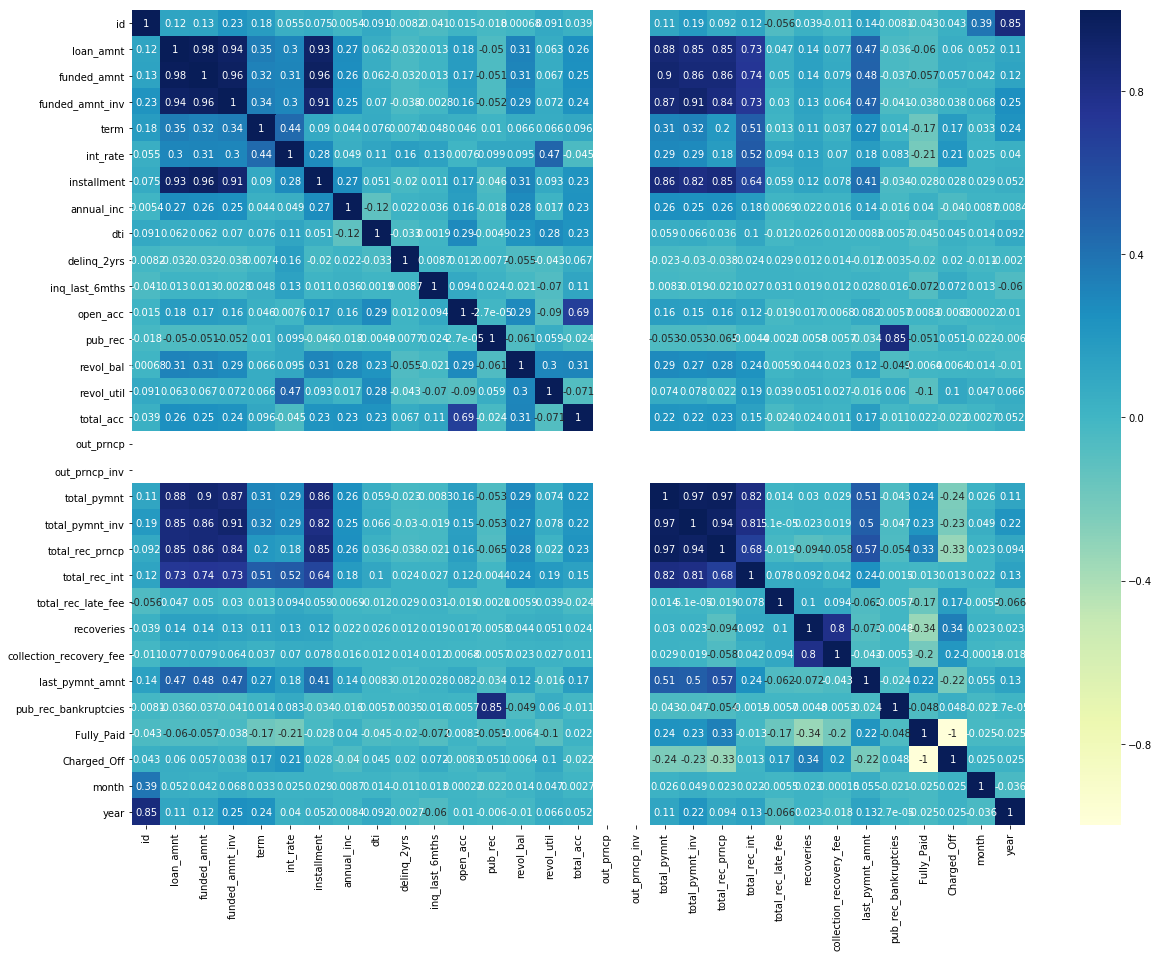

In [127]:
#Correlation: Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.
#Correlation Matrix : A correlation matrix is a table showing correlation coefficients between sets of variables. 
#This allows you to see which pairs have the highest correlation.
correlation = loan_df.corr()
round(correlation,3)
plt.figure(figsize=(20,15))
sns.heatmap(correlation, cmap='YlGnBu', annot=True)
plt.show()